<h1 style="text-align:center; color:#DC143C"> PROJECT : STROKE PREDICTION - SUPERVISED ML</h1>

### Problem Statement
Stroke is a medical condition that occurs when blood vessels in the brain are ruptured or blocked, resulting in brain damage. Stroke prediction is a critical area of research in healthcare, as strokes are one of the leading global causes of mortality ([WHO: Top 10 Causes of Death](https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death)). This underscores the need for early detection and prevention strategies. This project investigates the effectiveness of machine learning techniques in predicting stroke occurrences based on various clinical and lifestyle factors.      

### Dataset Information
The dataset used in this project can be downloaded from [data.world - stroke prediction dataset](https://data.world/rohit0308/stroke-prediction-23).    

### Goal of the Project
The primary goal of this project is to develop a model that predicts the likelihood of a stroke based on input parameters like gender, age, symptoms, and lifestyle factors. Additionally, the project aims to analyze the dataset to identify the most significant factors that contribute to stroke prediction.

<br>

# IMPORTING GENERAL LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored

#library configurations
%matplotlib inline
sns.set_theme(palette='flare')
pd.pandas.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

<hr>

# IMPORTING DATASET

In [2]:
file_path = '../DATA/Stroke_Dataset.csv'
df = pd.read_csv(file_path)

### Data Story

**Total Instances** : 12760 <br>
**Number of Attributes** : 28 (*27 features, 1 Target*) <br>
**Target Variable** : Diagnosis (Categorical, Binary - *stroke* or *no stroke*) 

### Attributes

| No. | Attribute                             | Description                                                                         | Data Type |
|-----|:---------------------------------------|:-------------------------------------------------------------------------------------|:-----------|
| 1   | Patient_Name                          | Name of the patient.                                                                | string    |
| 2   | Patient_ID                            | Unique ID assigned to each patient.                                                 | integer   |
| 3   | Patient_Age                           | Age of the patient in years.                                                        | decimal   |
| 4   | Patient_Gender                        | Gender of the patient.                                                              | string    |
| 5   | Record_Date                           | Date of the medical record.                                                         | date      |
| 6   | Dietary_Habits                        | Type of diet followed by the patient (e.g., Pescatarian, Keto, Gluten-Free, etc.).  | string    |
| 7   | LDL_Cholesterol                       | Level of LDL (bad) cholesterol in the blood.                                        | decimal   |
| 8   | Work_Type_of_patient                  | Employment status/type of work (e.g., Government Job, Private, etc.).               | string    |
| 9   | Metabolic_Equivalent_of_Task_Score    | Measure of physical activity level based on metabolic equivalent tasks (MET).       | integer   |
| 10  | Marital_Status                        | Marital status of the patient (e.g., Married, Single, Divorced).                    | string    |
| 11  | Physical_Activity                     | Patient’s overall physical activity level (e.g., Low, Moderate).                    | string    |
| 12  | Cholesterol_Levels                    | Detailed cholesterol profile including HDL and LDL values.                          | string    |
| 13  | Stress_Levels                         | Patient’s perceived stress level (numeric value).                                   | decimal   |
| 14  | Average_Glucose_Level                 | Average glucose level in blood.                                                     | decimal   |
| 15  | Heart_Disease                         | Binary indicator (0 or 1) for presence of heart disease.                            | integer   |
| 16  | Body_Mass_Index                       | Patient’s body mass index (BMI).                                                    | decimal   |
| 17  | Alcohol_Intake                        | Frequency of alcohol consumption (e.g., Never, Rarely, Frequent Drinker).           | string    |
| 18  | HDL_Cholesterol                       | Level of HDL (good) cholesterol in the blood.                                       | decimal   |
| 19  | Hypertension                          | Binary indicator for presence of hypertension (1 if present, 0 if not).             | integer   |
| 20  | Family_History_of_Stroke              | Binary indicator if there is a family history of stroke.                            | string    |
| 21  | Diagnosis                             | Current diagnosis related to the patient’s health status (e.g., Stroke, No Stroke). | string    |
| 22  | Residence_Type                        | Patient’s type of residence (e.g., Rural, Urban).                                   | string    |
| 23  | Systolic_BP                           | Systolic blood pressure measurement.                                                | decimal   |
| 24  | Smoking_Status                        | Patient’s smoking status (e.g., Non-smoker, Currently Smokes, Formerly Smoked).     | string    |
| 25  | Diastolic_BP                          | Diastolic blood pressure measurement.                                               | decimal   |
| 26  | Stroke_History                        | Binary indicator (1 if patient has a history of stroke, 0 if not).                  | integer   |
| 27  | Symptoms                              | Symptoms related to health condition (e.g., Confusion, Seizures, Weakness).         | string    |
| 28  | Blood_Pressure_Levels                 | Full blood pressure reading, represented as Systolic/Diastolic (e.g., 120/80).      | string    |


<hr>

# DATA EXPLORATION AND INITIAL PREPROCESSING

In [3]:
rows, cols = df.shape
print(f'Dataset contains {rows} rows and {cols} columns')

Dataset contains 12760 rows and 28 columns


In [4]:
# displaying 5 sample rows
df.sample(5)

,Patient_Name,Patient_ID,Patient_Age,Patient_Gender,Record_Date,Dietary_Habits,LDL_Cholesterol,Work_Type_of_patient,Metabolic_Equivalent_of_Task_Score,Marital_Status,Physical_Activity,Cholesterol_Levels,Stress_Levels,Average_Glucose_Level,Heart_Disease,Body_Mass_Index,Alcohol_Intake,HDL_Cholesterol,Hypertension,Family_History_of_Stroke,Diagnosis,Residence_Type,Systolic_BP,Smoking_Status,Diastolic_BP,Stroke_History,Symptoms,Blood_Pressure_Levels
11705,Yashvi Bose,83380,52.0,Female,2020-05-22,Vegetarian,154.0,Private,6,Married,Moderate,"HDL: 51, LDL: 154",4.33,124.12,0,30.57,Frequent Drinker,51.0,1,Yes,Stroke,Rural,117.0,Formerly Smoked,110.0,0,Severe Fatigue,117/110
1867,Azad Aurora,97635,29.0,Male,2022-05-01,Vegan,150.0,Private,7,Divorced,Low,"HDL: 46, LDL: 150",7.14,187.14,0,30.21,Never,46.0,0,Yes,Stroke,Rural,138.0,Currently Smokes,72.0,0,Weakness,138/72
4801,Ira Basu,84912,64.0,Female,2021-07-05,Gluten-Free,114.0,Private,8,Married,Low,"HDL: 61, LDL: 114",6.36,111.73,1,34.88,Rarely,61.0,0,No,No Stroke,Rural,98.0,Currently Smokes,81.0,1,"Loss of Balance, Difficulty Speaking, Severe F...",98/81
5951,Devansh Wadhwa,3151,21.0,Female,2021-11-12,Keto,115.0,Government Job,7,Single,Moderate,"HDL: 51, LDL: 115",5.49,166.57,0,26.20,Frequent Drinker,51.0,0,Yes,No Stroke,Urban,118.0,Non-smoker,64.0,0,"Difficulty Speaking, Dizziness, Numbness, Blur...",118/64
5684,Advik Ben,50490,43.0,Male,2020-04-27,Keto,62.0,Private,8,Single,Moderate,"HDL: 64, LDL: 62",9.21,120.95,0,39.90,Social Drinker,64.0,0,Yes,Stroke,Urban,170.0,Currently Smokes,84.0,1,"Confusion, Confusion, Loss of Balance",170/84


<br>

***Columns 'Systolic_BP' and 'Diastolic_BP' are derived from column 'Blood_Pressure_Levels'***<br>   
***Columns 'LDL_Cholesterol' and 'HDL_Cholesterol' are derived from column 'Cholesterol_Levels'***

In [5]:
# displaying columns
df.columns

Index(['Patient_Name', 'Patient_ID', 'Patient_Age', 'Patient_Gender',
       'Record_Date', 'Dietary_Habits', 'LDL_Cholesterol',
       'Work_Type_of_patient', 'Metabolic_Equivalent_of_Task_Score',
       'Marital_Status', 'Physical_Activity', 'Cholesterol_Levels',
       'Stress_Levels', 'Average_Glucose_Level', 'Heart_Disease',
       'Body_Mass_Index', 'Alcohol_Intake', 'HDL_Cholesterol', 'Hypertension',
       'Family_History_of_Stroke', 'Diagnosis', 'Residence_Type',
       'Systolic_BP', 'Smoking_Status', 'Diastolic_BP', 'Stroke_History',
       'Symptoms', 'Blood_Pressure_Levels'],
      dtype='object')

In [6]:
# basic info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12760 entries, 0 to 12759
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Patient_Name                        12760 non-null  object 
 1   Patient_ID                          12760 non-null  int64  
 2   Patient_Age                         11488 non-null  float64
 3   Patient_Gender                      12760 non-null  object 
 4   Record_Date                         12760 non-null  object 
 5   Dietary_Habits                      12760 non-null  object 
 6   LDL_Cholesterol                     12760 non-null  float64
 7   Work_Type_of_patient                12760 non-null  object 
 8   Metabolic_Equivalent_of_Task_Score  12760 non-null  int64  
 9   Marital_Status                      12760 non-null  object 
 10  Physical_Activity                   12760 non-null  object 
 11  Cholesterol_Levels                  12760

***There are missing values in some columns***

<br>

## Target - Diagnosis

In [7]:
df_copy = df.copy()

In [8]:
# value count - Diagnosis
print('Distribution of diagnosis')
df_copy['Diagnosis'].value_counts()

Distribution of diagnosis


Diagnosis
No Stroke    6415
Stroke       6345
Name: count, dtype: int64

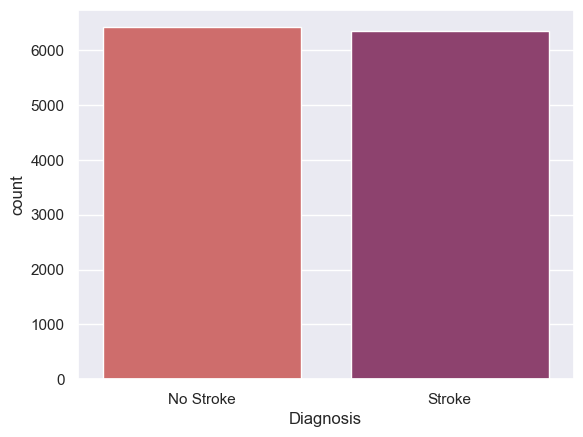

In [9]:
# count plot - Diagnosis
sns.countplot(data=df_copy, x='Diagnosis', palette="flare")
plt.show()

***The dataset appears to be nearly balanced. No need to resample while implementing models. Also there are no missing values in target.***

<br>

## Numerical Features

In [10]:
# descriptive statistics of numerical variables
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_ID,12760.0,49920.753292,28937.409434,1.00,24920.5000,49736.50,75169.00,99975.0
Patient_Age,11488.0,53.926880,21.045533,18.00,36.0000,54.00,72.00,90.0
LDL_Cholesterol,12760.0,125.202900,37.556655,60.00,92.0000,125.00,158.00,190.0
Metabolic_Equivalent_of_Task_Score,12760.0,7.158856,1.168834,4.00,6.0000,7.00,8.00,10.0
Stress_Levels,12760.0,5.026806,2.875024,0.00,2.5300,5.05,7.54,10.0
Average_Glucose_Level,12635.0,129.489588,40.430230,60.00,94.6700,128.60,164.52,200.0
Heart_Disease,12760.0,0.503840,0.500005,0.00,0.0000,1.00,1.00,1.0
Body_Mass_Index,10846.0,27.493956,7.268807,15.01,21.1125,27.44,33.81,40.0
HDL_Cholesterol,12760.0,55.044122,14.831795,30.00,42.0000,55.00,68.00,80.0
Hypertension,12760.0,0.247806,0.431755,0.00,0.0000,0.00,0.00,1.0


***Mean and Median of most columns are equal or almost equal, which might indicate that the data in those columns might be symmetrically distributed.***

In [11]:
numerical_columns = list(df_copy.drop(columns=['Diagnosis']).select_dtypes(include=['float64', 'int64']).columns)

### Plotting Distributions

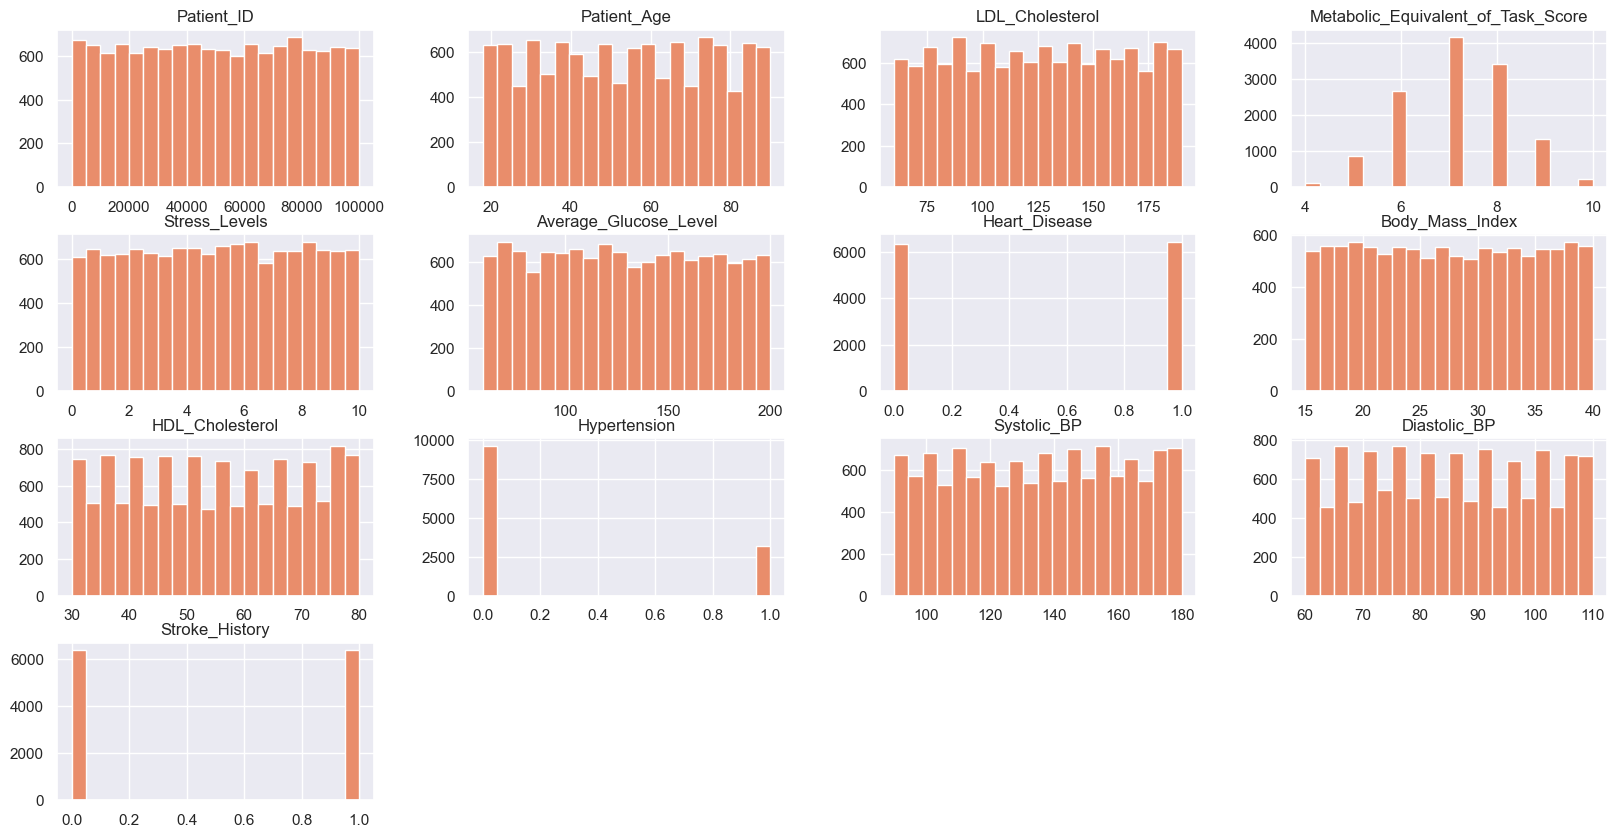

In [12]:
# plotting distribution of numerical columns
df_copy[numerical_columns].hist(bins=20, figsize=(20,10))
plt.show()

***Column 'Patient_ID' represents a unique identifier and is not useful for any other useful interpretations***<br>    
***All other columns except 'Patient_ID' follows distributions that appears like uniform distribution or skewed normal distribution.***<br>    
***Columns 'Heart_Disease', 'Hypertension' and 'Stroke_History' have 2 distinct values or outcomes (0 and 1). These columns could be converted to type bool or object, which will make more sense.***<br>           
***Column 'Metabolic_Equivalent_of_Task_Score' with 7 distinct values could also be converted to type object.***<br>        
***Columns 'Patient_Age' and 'Body_Mass_Index' can be used for deriving age groups and BMI categories**

In [13]:
# dropping patient_ID
df_copy = df_copy.drop(columns=['Patient_ID'])

In [14]:
# changing data type of columns
df_copy['Heart_Disease'] = df_copy['Heart_Disease'].astype(bool)
df_copy['Hypertension'] = df_copy['Hypertension'].astype(bool)
df_copy['Stroke_History'] = df_copy['Stroke_History'].astype(bool)
df_copy['Metabolic_Equivalent_of_Task_Score'] = df_copy['Metabolic_Equivalent_of_Task_Score'].astype(object)

In [15]:
df_copy['Age_Group'] = pd.cut(df_copy['Patient_Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])

In [16]:
df_copy['BMI_Category'] = pd.cut(df_copy['Body_Mass_Index'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [17]:
numerical_features = list(df_copy.select_dtypes(include=['float64', 'int64']).columns)

In [18]:
numerical_features

['Patient_Age',
 'LDL_Cholesterol',
 'Stress_Levels',
 'Average_Glucose_Level',
 'Body_Mass_Index',
 'HDL_Cholesterol',
 'Systolic_BP',
 'Diastolic_BP']

### Correlation Analysis

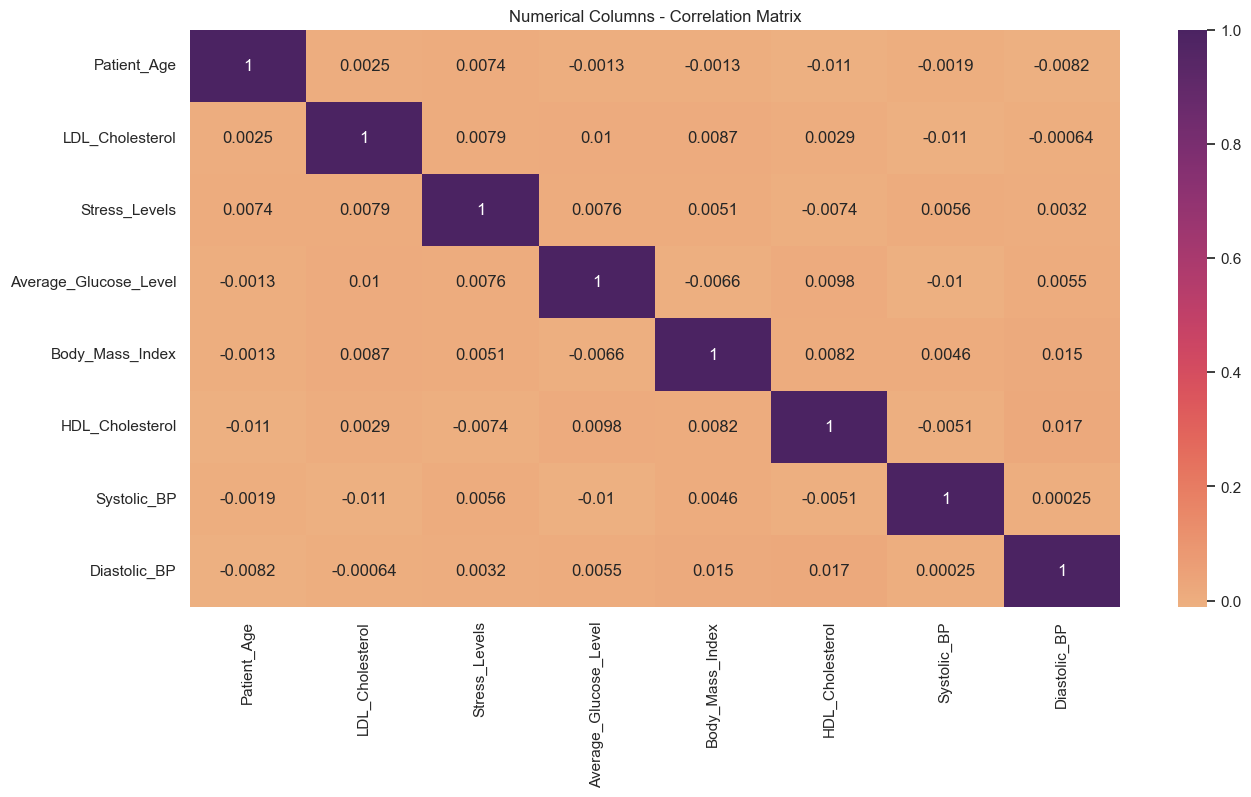

In [19]:
correlation_matrix = df_copy[numerical_features].corr()
# plotting heatmap
plt.figure(figsize=(15, 7.5))
sns.heatmap(correlation_matrix, annot=True, cmap='flare')
plt.title('Numerical Columns - Correlation Matrix')
plt.show()

***Heatmap shows that correlations between variables are extremely weak, with values very close to 0.*** 

<br>

## Categorical Features

In [20]:
# descriptive statistics of categorical variables
df_copy.describe(include=['object', 'bool', 'category']).T

,count,unique,top,freq
Patient_Name,12760,11905,Riya Ghosh,4
Patient_Gender,12760,2,Male,6480
Record_Date,12760,1461,2020-08-30,20
Dietary_Habits,12760,7,Vegan,1869
Work_Type_of_patient,12760,4,Private,3282
Metabolic_Equivalent_of_Task_Score,12760,7,7,4160
Marital_Status,12760,3,Single,4394
Physical_Activity,12760,3,High,4312
Cholesterol_Levels,12760,5716,"HDL: 50, LDL: 185",9
Heart_Disease,12760,2,True,6429


***Column 'Patient_Name' can be dropped.***<br>      
***Columns 'Cholesterol_Levels' and 'Blood_Pressure_Levels' can also be dropped since columns derived from these are already present in dataset.***<br>     
***Column 'Record_Date' might be useful in deriving other features like month or day and can be dropped afterwards.***<br>   
***Column 'Symptoms' might be useful in enginineering additional features such as presence/absence of individual symptoms.***<br>       

In [21]:
# dropping columns
df_copy = df_copy.drop(columns=['Patient_Name', 'Cholesterol_Levels', 'Blood_Pressure_Levels'])

In [22]:
# converting 'Record_Date' to datetime and extracting features
df_copy['Record_Date'] = pd.to_datetime(df_copy['Record_Date'])
df_copy['Month'] = df_copy['Record_Date'].dt.month
df_copy['DayofWeek'] = df_copy['Record_Date'].dt.dayofweek

In [23]:
type(df_copy['Month'][0])

numpy.int32

In [24]:
df_copy['Month'].value_counts()

Month
7     1127
5     1104
11    1102
12    1102
8     1071
3     1062
10    1050
9     1048
4     1040
2     1039
1     1035
6      980
Name: count, dtype: int64

In [25]:
df_copy['Month'] = df_copy['Month'].astype('object')

In [26]:
type(df_copy['DayofWeek'][0])

numpy.int32

In [27]:
df_copy['DayofWeek'].value_counts()

DayofWeek
2    1949
6    1831
5    1830
0    1815
4    1791
1    1772
3    1772
Name: count, dtype: int64

In [28]:
df_copy['DayofWeek'] = df_copy['DayofWeek'].astype('object')

In [29]:
# dropping 'Record_Date'
df_copy = df_copy.drop(columns=['Record_Date'])

In [30]:
df_copy['Symptoms'][8237]

'Severe Fatigue, Weakness, Numbness, Confusion, Dizziness'

In [31]:
type(df_copy['Symptoms'][8237])

str

***The column 'Symptoms' contains multiple symptoms seperated by ', '. The column can be splitted into multiple columns, each representing a symptons, for further processing***

In [32]:
#initially used the following explicit approach to engineer features from 'Symptoms'
#------------------------------------------------------------------------------------
# df_copy['Symptoms'].isna().sum()
# df_copy['Symptoms'].fillna('Unknown', inplace = True)
# unique_symptoms = set()
# df_copy['Symptoms'].str.split(', ').apply(unique_symptoms.update) #update the set with unique symptoms
# #print(unique_symptoms)
# # creating columns to specify whether a symptom is present or not
# for symptom in unique_symptoms:
#     df_copy[symptom] = df_copy['Symptoms'].str.contains(symptom).astype(int) # contains returns true or false
#     df_copy[symptom] = df_copy[symptom].astype(bool)

In [33]:
df_copy['Symptoms'].isna().sum()

2145

***Column 'Symptoms' contains 2145 missing entries, all of which will be replaced by 'Unknown' for further processing.***

In [34]:
# replacing fields without entries with 'Unknown'
df_copy['Symptoms'].fillna('Unknown', inplace=True)

`MultiLabelBinarizer` transforms multilabel data into a binary matrix where each column represents a unique label, and each row corresponds to an instance. A value of 1 indicates the presence of a label, while 0 indicates its absence.

In [35]:
# extracting unique symptoms using MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
Symptoms_encoded = pd.DataFrame(
                mlb.fit_transform(df_copy['Symptoms'].str.split(', ')),
                columns=mlb.classes_,
                index=df_copy.index
            )

In [36]:
Symptoms_encoded.columns

Index(['Blurred Vision', 'Confusion', 'Difficulty Speaking', 'Dizziness',
       'Headache', 'Loss of Balance', 'Numbness', 'Seizures', 'Severe Fatigue',
       'Unknown', 'Weakness'],
      dtype='object')

In [37]:
# adding 'Symptom_' as prefix to all symptoms
Symptoms_encoded.columns = ['Symptom_' + col  for col in Symptoms_encoded.columns]

In [38]:
Symptoms_encoded.columns

Index(['Symptom_Blurred Vision', 'Symptom_Confusion',
       'Symptom_Difficulty Speaking', 'Symptom_Dizziness', 'Symptom_Headache',
       'Symptom_Loss of Balance', 'Symptom_Numbness', 'Symptom_Seizures',
       'Symptom_Severe Fatigue', 'Symptom_Unknown', 'Symptom_Weakness'],
      dtype='object')

In [39]:
len(Symptoms_encoded.columns)

11

`MultiLabelBinarizer` extracted and generated 11 columns, each representing a unique symptom including 'Unknown' 

In [40]:
type(Symptoms_encoded['Symptom_Confusion'][0])

numpy.int32

In [41]:
# converting columns to type 'bool'
for symptom in Symptoms_encoded.columns:
    Symptoms_encoded[symptom] = Symptoms_encoded[symptom].astype(bool)

In [42]:
df_copy['Symptoms'][8237]

'Severe Fatigue, Weakness, Numbness, Confusion, Dizziness'

In [43]:
Symptoms_encoded.iloc[8237]

Symptom_Blurred Vision         False
Symptom_Confusion               True
Symptom_Difficulty Speaking    False
Symptom_Dizziness               True
Symptom_Headache               False
Symptom_Loss of Balance        False
Symptom_Numbness                True
Symptom_Seizures               False
Symptom_Severe Fatigue          True
Symptom_Unknown                False
Symptom_Weakness                True
Name: 8237, dtype: bool

In [44]:
#joining dataframe and 'Symptoms_encoded'
df_copy = pd.concat([df_copy, Symptoms_encoded], axis=1)
df_copy = df_copy.drop(columns = 'Symptoms')

In [45]:
categorical_features = list(df_copy.select_dtypes(include=['object', 'bool', 'category']).columns)
categorical_features.remove('Diagnosis')

### Distribution of Categorical Features

In [46]:
# function to plot value count and pie chart ssowing distribution
def plot_count(df, feature):
    counts = df[feature].value_counts()
    print(f'Count of {feature}')
    print(counts)
    plt.figure(figsize=(7, 7))
    plt.pie(counts, labels=counts.index, autopct='%.0f%%')
    plt.title(f'Distribution of {feature}')
    plt.show()

Count of Patient_Gender
Patient_Gender
Male      6480
Female    6280
Name: count, dtype: int64


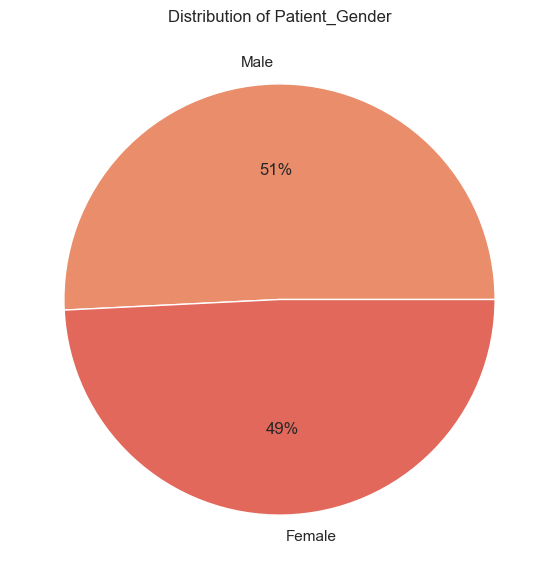

Count of Dietary_Habits
Dietary_Habits
Vegan             1869
Non-Vegetarian    1858
Paleo             1855
Vegetarian        1843
Keto              1794
Gluten-Free       1773
Pescatarian       1768
Name: count, dtype: int64


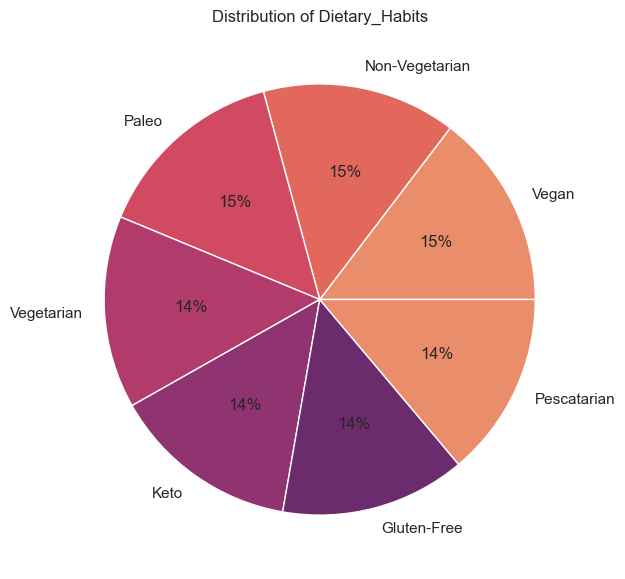

Count of Work_Type_of_patient
Work_Type_of_patient
Private           3282
Self-employed     3254
Government Job    3209
Never Worked      3015
Name: count, dtype: int64


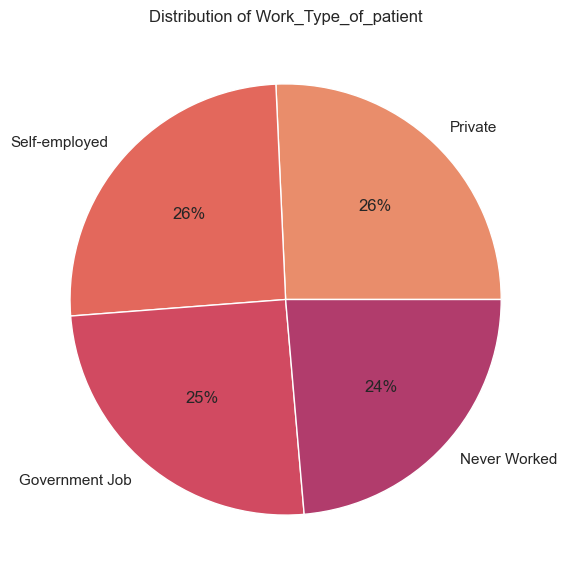

Count of Metabolic_Equivalent_of_Task_Score
Metabolic_Equivalent_of_Task_Score
7     4160
8     3412
6     2662
9     1343
5      868
10     212
4      103
Name: count, dtype: int64


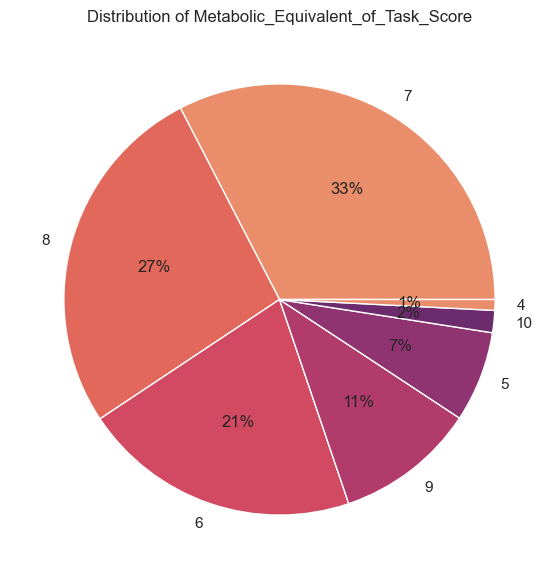

Count of Marital_Status
Marital_Status
Single      4394
Divorced    4253
Married     4113
Name: count, dtype: int64


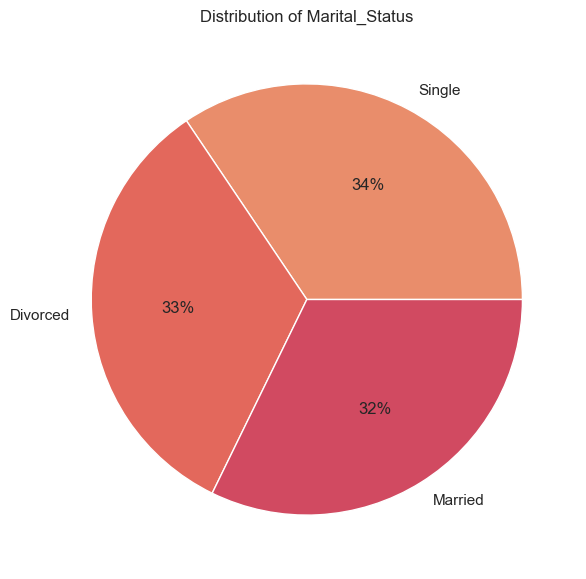

Count of Physical_Activity
Physical_Activity
High        4312
Low         4233
Moderate    4215
Name: count, dtype: int64


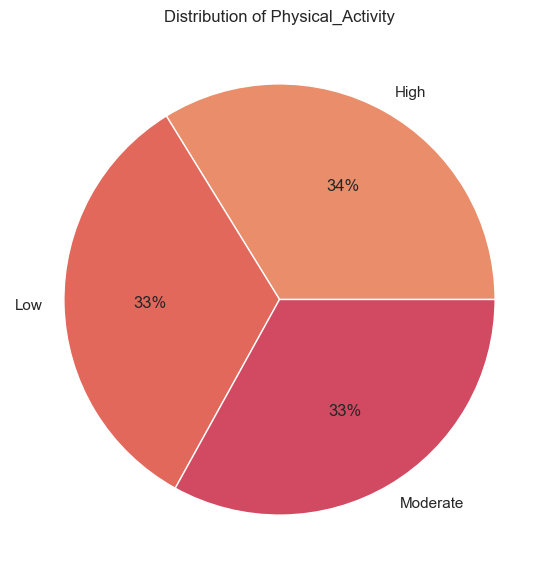

Count of Heart_Disease
Heart_Disease
True     6429
False    6331
Name: count, dtype: int64


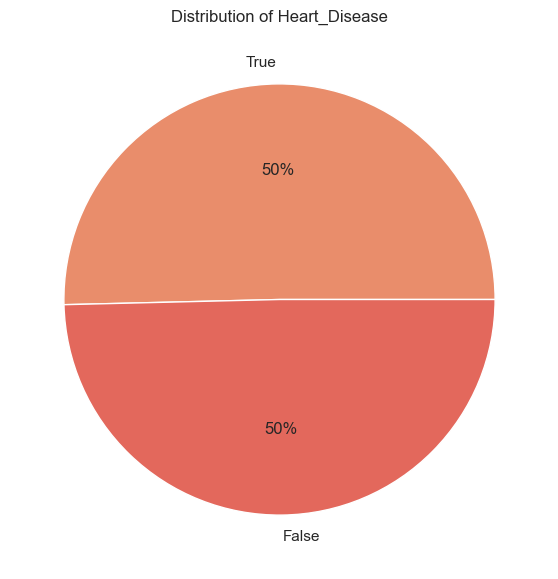

Count of Alcohol_Intake
Alcohol_Intake
Rarely              3180
Social Drinker      3121
Never               3113
Frequent Drinker    3093
Name: count, dtype: int64


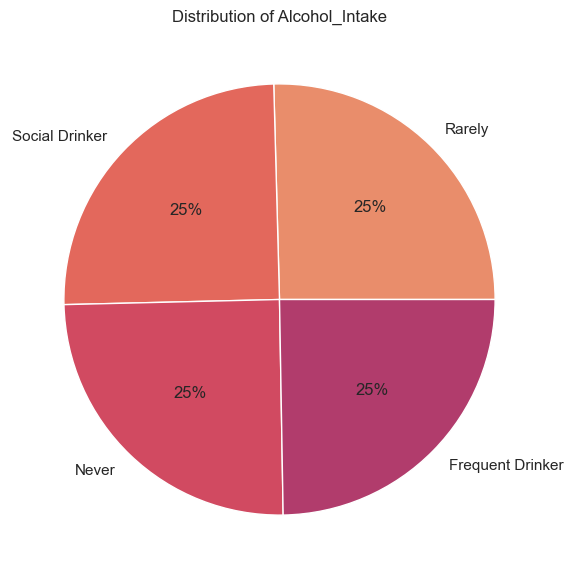

Count of Hypertension
Hypertension
False    9598
True     3162
Name: count, dtype: int64


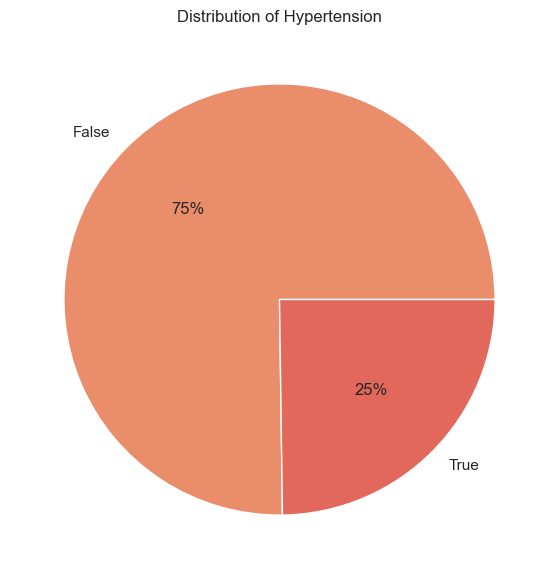

Count of Family_History_of_Stroke
Family_History_of_Stroke
Yes    6466
No     6294
Name: count, dtype: int64


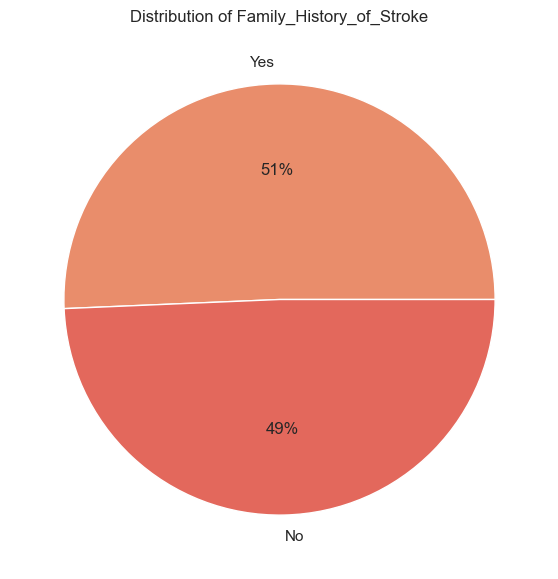

Count of Residence_Type
Residence_Type
Rural    6412
Urban    6348
Name: count, dtype: int64


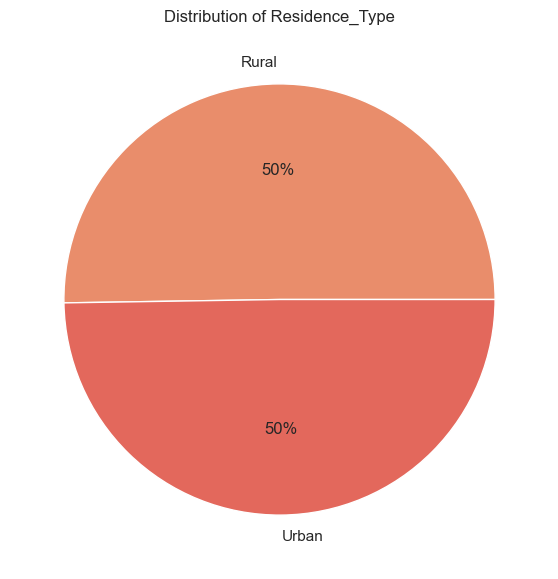

Count of Smoking_Status
Smoking_Status
Non-smoker          4283
Currently Smokes    4244
Formerly Smoked     4233
Name: count, dtype: int64


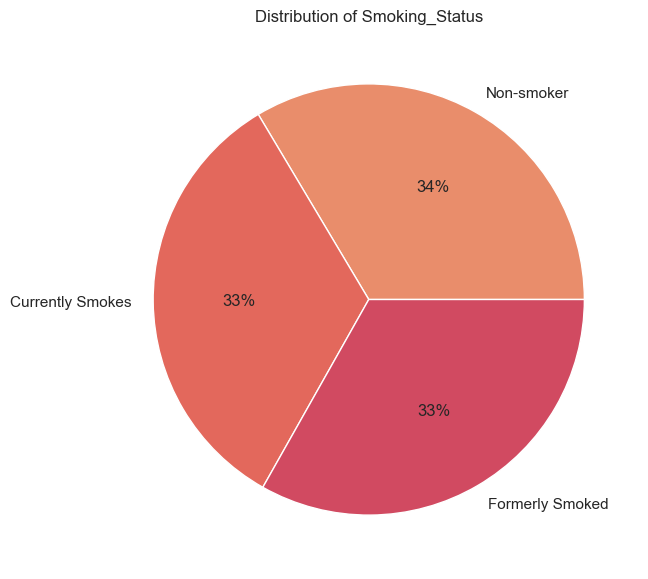

Count of Stroke_History
Stroke_History
False    6380
True     6380
Name: count, dtype: int64


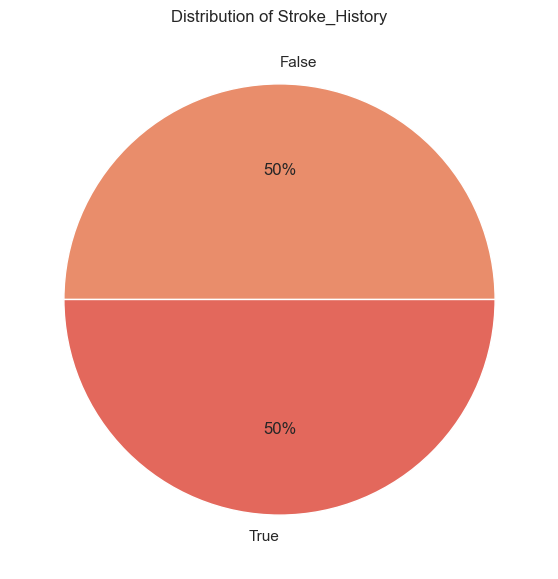

Count of Age_Group
Age_Group
65+      3934
19-35    2701
36-50    2359
51-65    2335
0-18      159
Name: count, dtype: int64


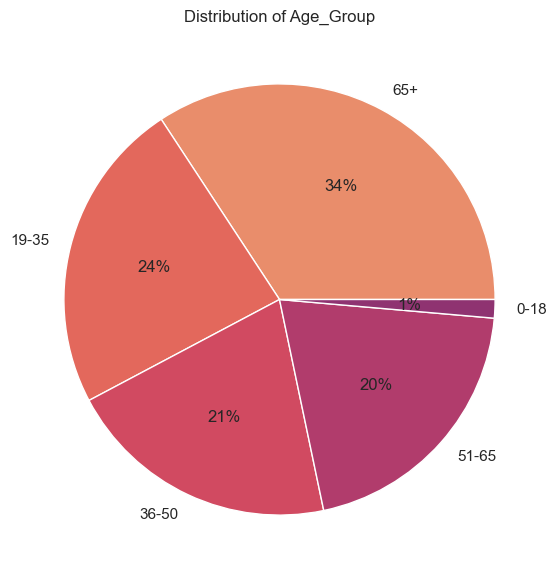

Count of BMI_Category
BMI_Category
Obese          4407
Normal         2811
Overweight     2087
Underweight    1541
Name: count, dtype: int64


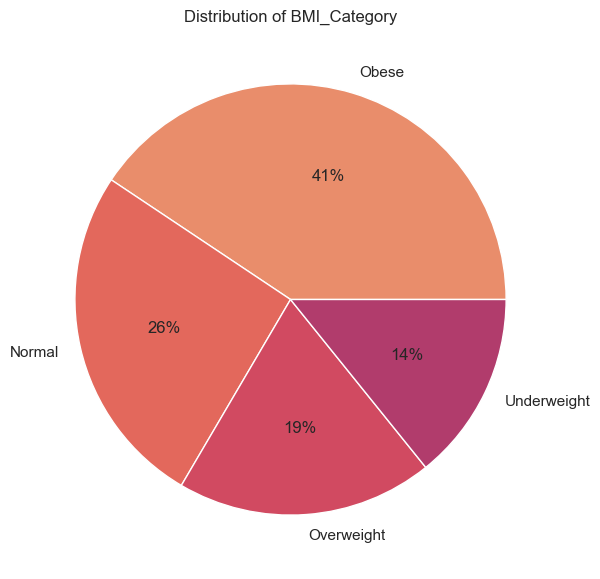

Count of Month
Month
7     1127
5     1104
11    1102
12    1102
8     1071
3     1062
10    1050
9     1048
4     1040
2     1039
1     1035
6      980
Name: count, dtype: int64


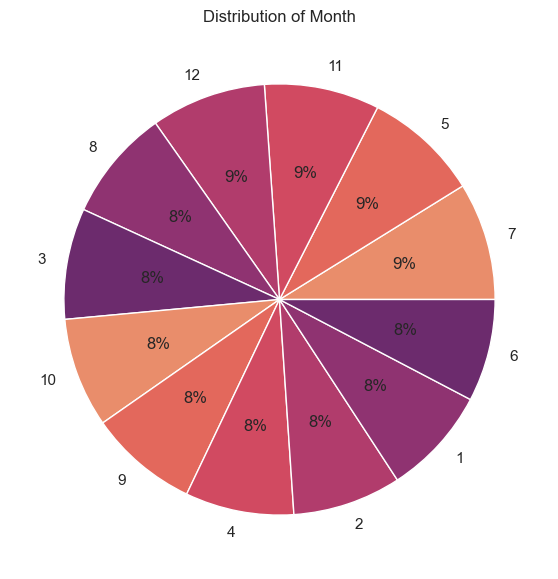

Count of DayofWeek
DayofWeek
2    1949
6    1831
5    1830
0    1815
4    1791
1    1772
3    1772
Name: count, dtype: int64


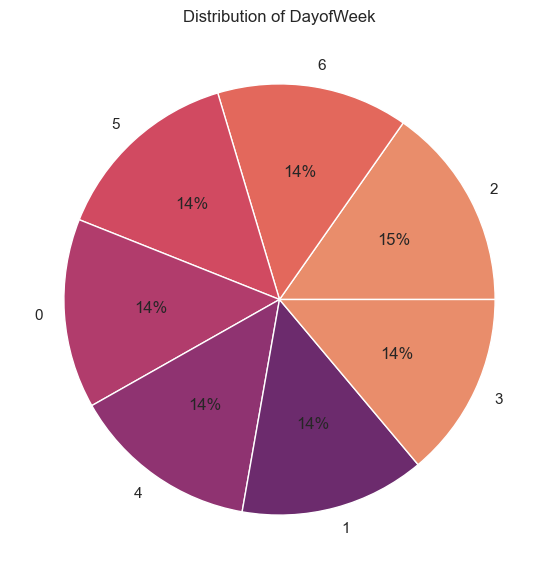

Count of Symptom_Blurred Vision
Symptom_Blurred Vision
False    9967
True     2793
Name: count, dtype: int64


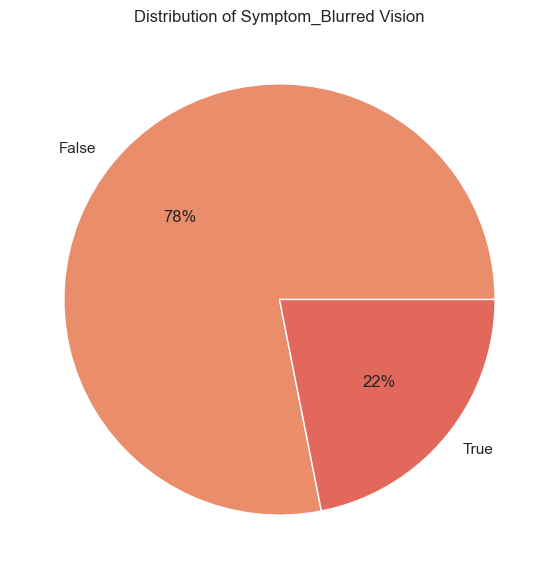

Count of Symptom_Confusion
Symptom_Confusion
False    9978
True     2782
Name: count, dtype: int64


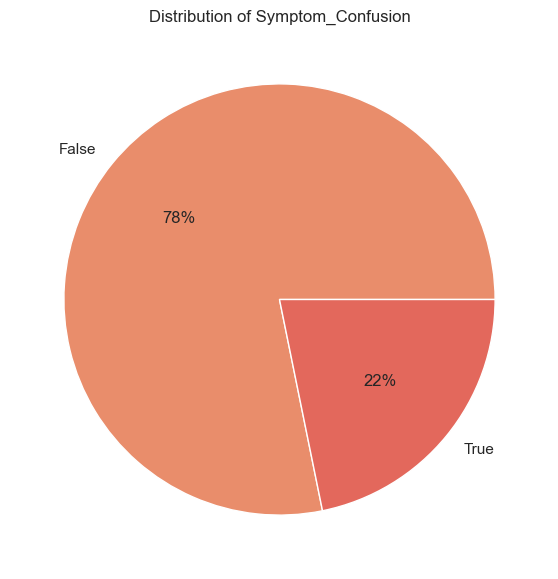

Count of Symptom_Difficulty Speaking
Symptom_Difficulty Speaking
False    9954
True     2806
Name: count, dtype: int64


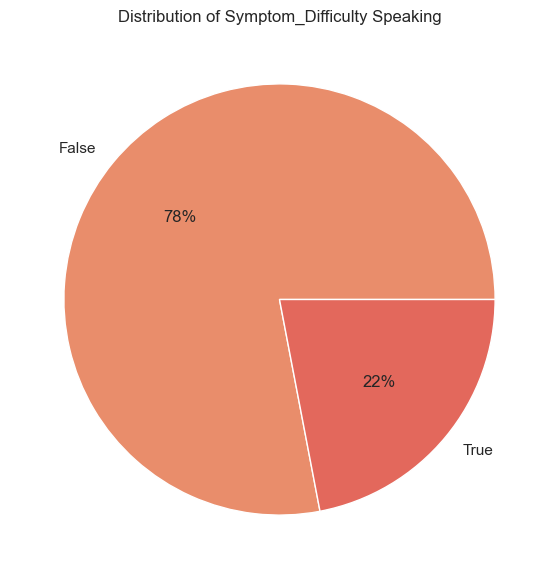

Count of Symptom_Dizziness
Symptom_Dizziness
False    9913
True     2847
Name: count, dtype: int64


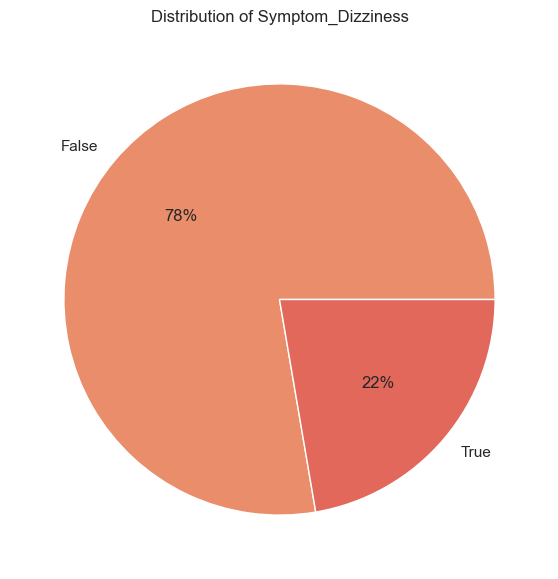

Count of Symptom_Headache
Symptom_Headache
False    9932
True     2828
Name: count, dtype: int64


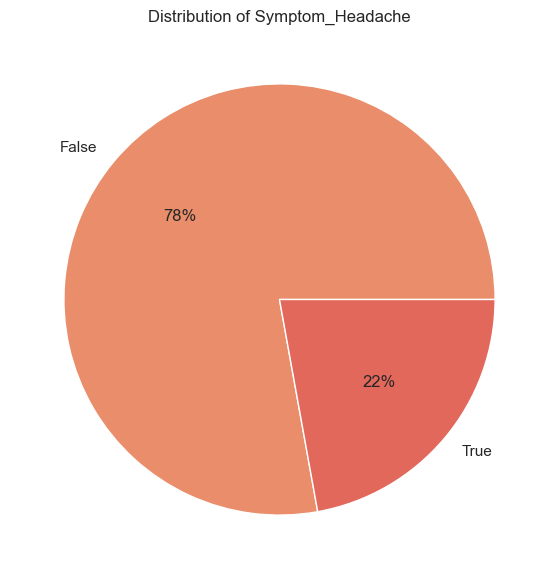

Count of Symptom_Loss of Balance
Symptom_Loss of Balance
False    9942
True     2818
Name: count, dtype: int64


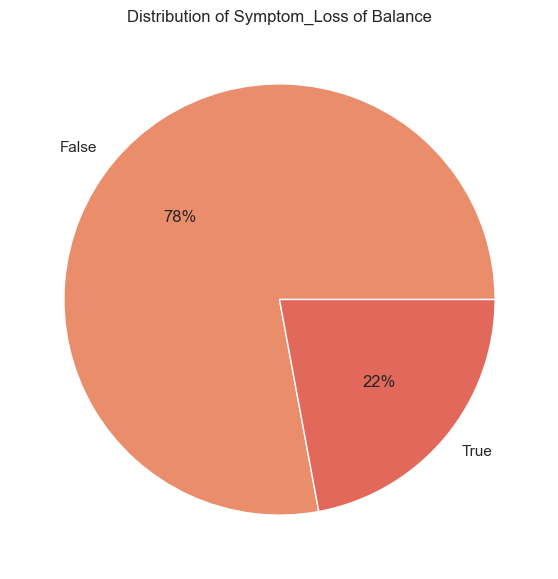

Count of Symptom_Numbness
Symptom_Numbness
False    9959
True     2801
Name: count, dtype: int64


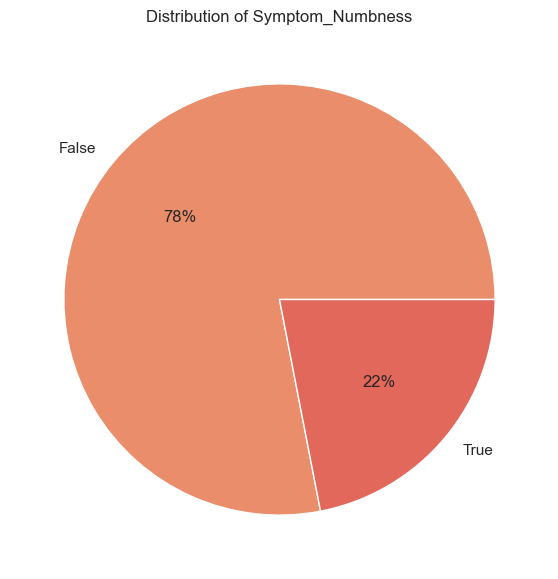

Count of Symptom_Seizures
Symptom_Seizures
False    9960
True     2800
Name: count, dtype: int64


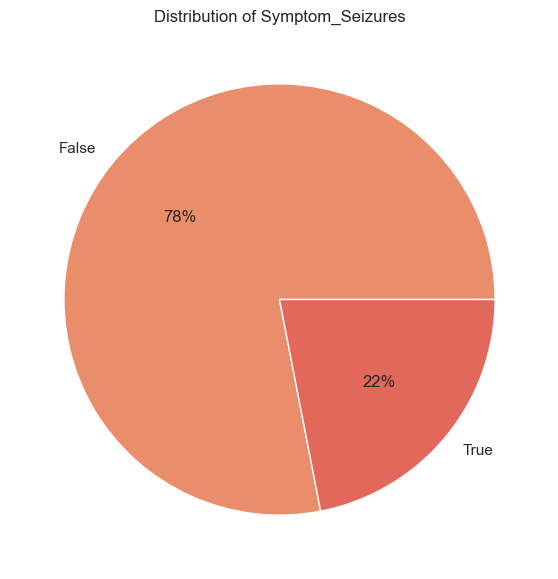

Count of Symptom_Severe Fatigue
Symptom_Severe Fatigue
False    10037
True      2723
Name: count, dtype: int64


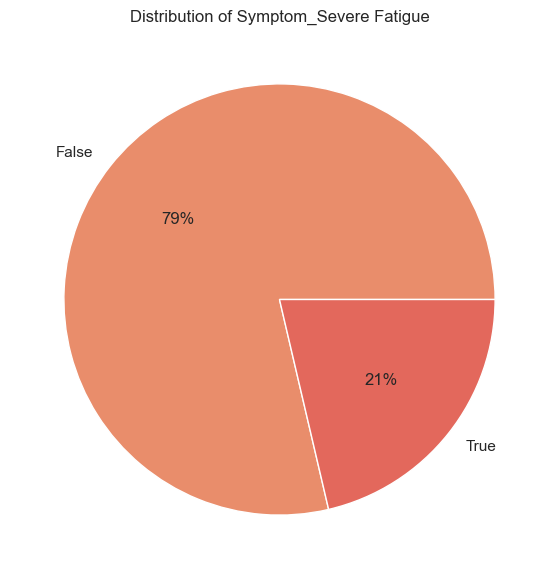

Count of Symptom_Unknown
Symptom_Unknown
False    10615
True      2145
Name: count, dtype: int64


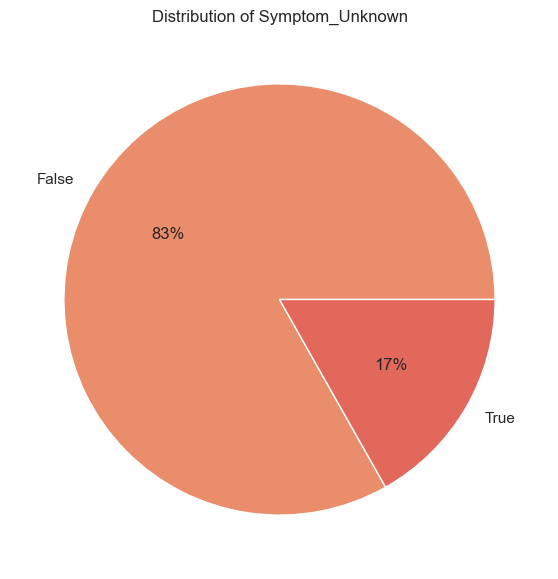

Count of Symptom_Weakness
Symptom_Weakness
False    9960
True     2800
Name: count, dtype: int64


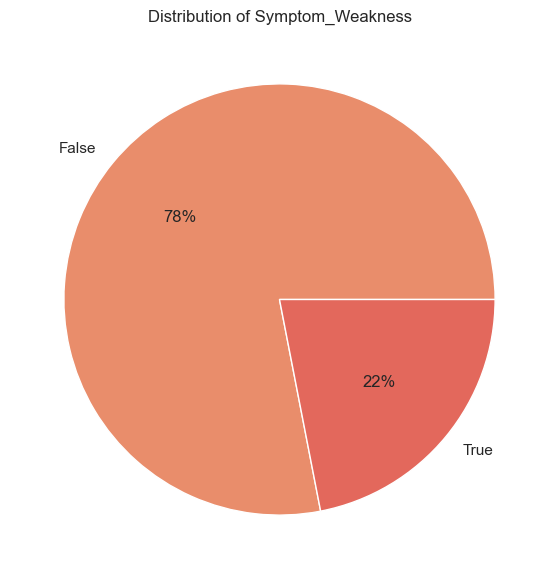

In [47]:
for feature in categorical_features:
    plot_count(df_copy, feature)

***Distribution of discrete values in categorical features are nearly balanced except for 'MET_Score', 'Hypertension', 'Age_Group', 'BMI_Category' and individual symptoms*** 

### Data Relationship Analysis

In [48]:
# plotting cross tabulations between features and target
def plot_crosstab(df, column, target):
    pd.crosstab(df[column], target).plot(kind="bar", figsize=(10, 4))
    plt.title(f'{column} VS {target.name}')
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(loc='upper left')
    plt.show()

In [49]:
categorical_features

['Patient_Gender',
 'Dietary_Habits',
 'Work_Type_of_patient',
 'Metabolic_Equivalent_of_Task_Score',
 'Marital_Status',
 'Physical_Activity',
 'Heart_Disease',
 'Alcohol_Intake',
 'Hypertension',
 'Family_History_of_Stroke',
 'Residence_Type',
 'Smoking_Status',
 'Stroke_History',
 'Age_Group',
 'BMI_Category',
 'Month',
 'DayofWeek',
 'Symptom_Blurred Vision',
 'Symptom_Confusion',
 'Symptom_Difficulty Speaking',
 'Symptom_Dizziness',
 'Symptom_Headache',
 'Symptom_Loss of Balance',
 'Symptom_Numbness',
 'Symptom_Seizures',
 'Symptom_Severe Fatigue',
 'Symptom_Unknown',
 'Symptom_Weakness']

In [50]:
target = df_copy['Diagnosis']

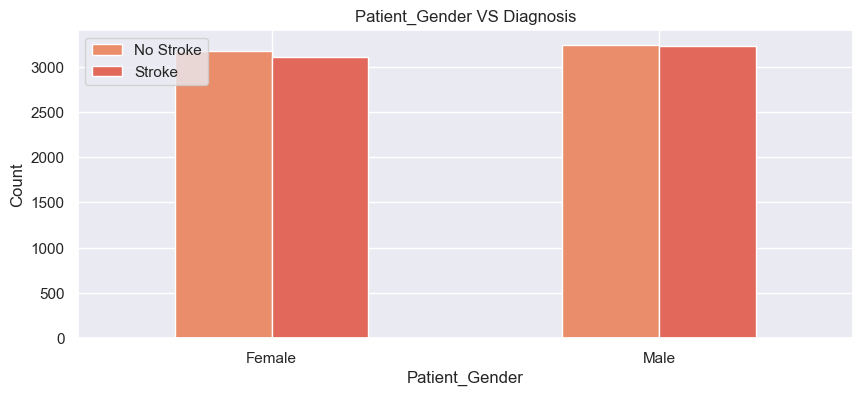

In [51]:
plot_crosstab(df_copy, 'Patient_Gender', target)

- Males show a notably higher incidence of stroke compared to females
- Total patient counts appear similar between genders
- Females have a more pronounced difference between stroke/No stroke cases

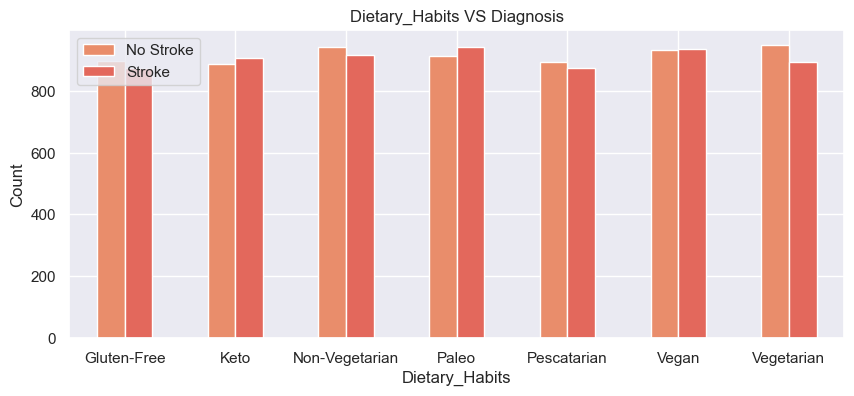

In [52]:
plot_crosstab(df_copy, 'Dietary_Habits', target)

- Distribution is relatively equal across different diets
- Vegan and Paleo diets show marginally higher stroke cases

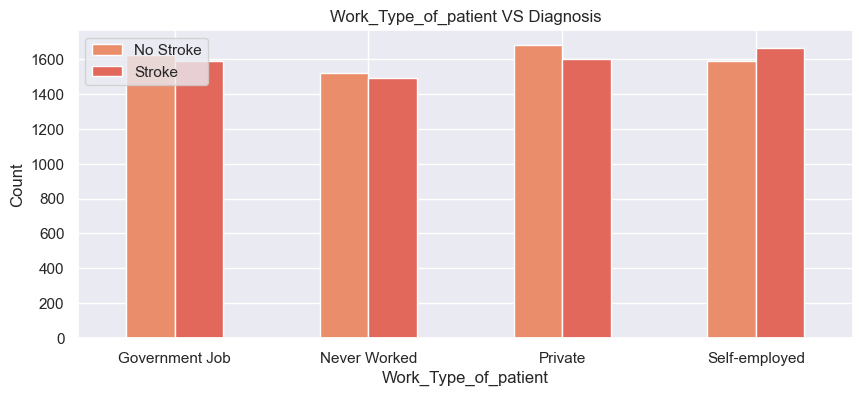

In [53]:
plot_crosstab(df_copy, 'Work_Type_of_patient', target)

- Private sector shows highest total patient count
- self-employed category have marginally higher stroke cases
- "Never Worked" category has slightly lower cases

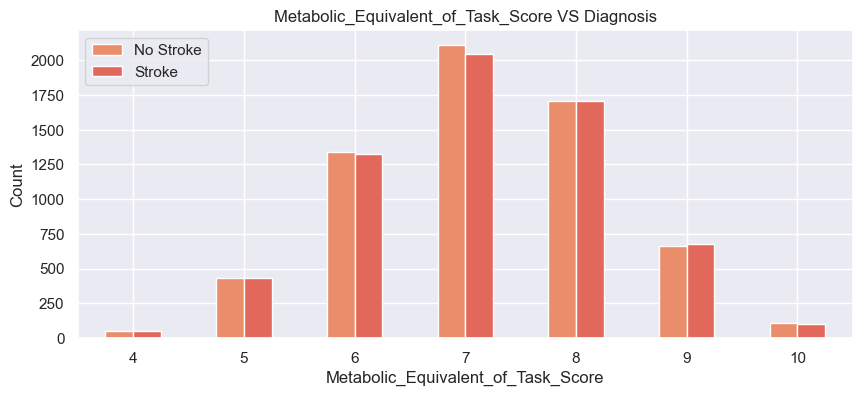

In [54]:
plot_crosstab(df_copy, 'Metabolic_Equivalent_of_Task_Score', target)

- Stroke vs No Stroke distribution remains almost consistent across all MET scores
- Physical activity level measured by MET score has a normal distribution, with moderate level of activity being most common
- Moderate activity (score 7) show notably lower stroke propotions and appears most protective against stroke risk

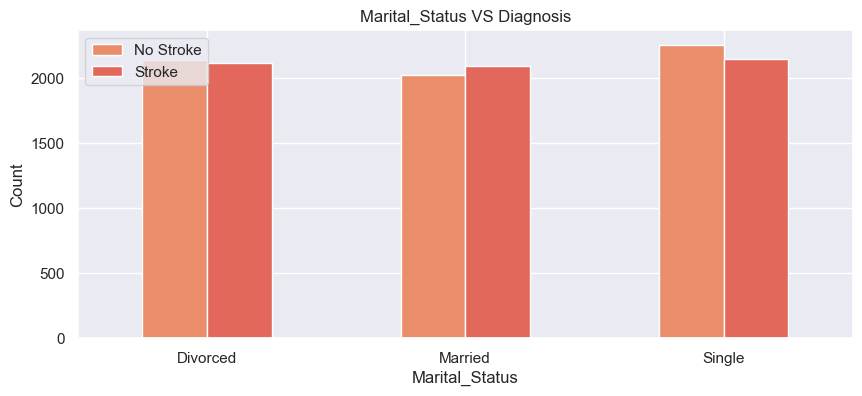

In [55]:
plot_crosstab(df_copy, 'Marital_Status', target)

- Single individuals show notably lower stroke propotions and appears most protective against stroke risk
- Divorced and Married groups have higher stroke rates and showsalmost equal stroke/No Stroke split

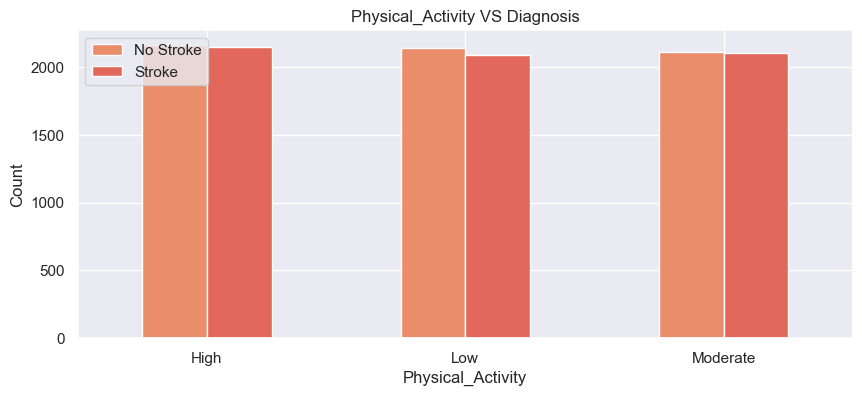

In [56]:
plot_crosstab(df_copy, 'Physical_Activity', target)

- High activity levels show higher stroke count
- Distribution suggests moderate physical activity may be most effective against stroke

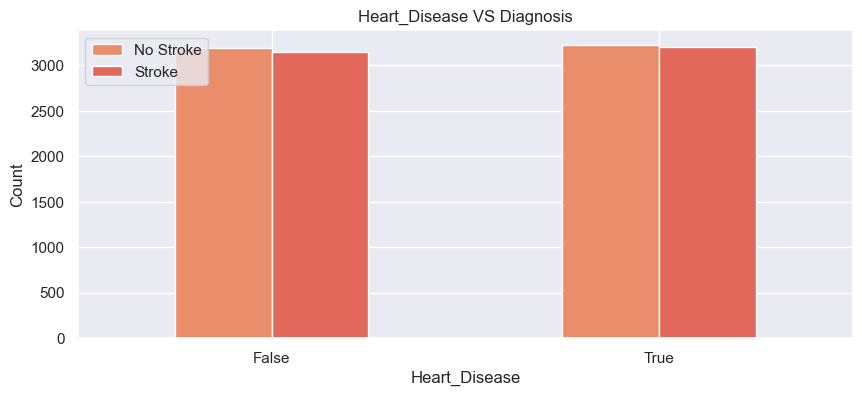

In [57]:
plot_crosstab(df_copy, 'Heart_Disease', target)

- Equivalent counts between those with/without heart diseas
- Slightly higher stroke incidence in those with heart disease

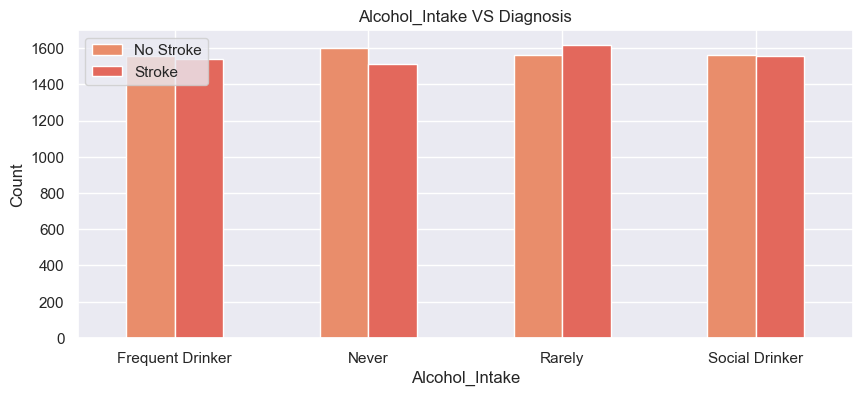

In [58]:
plot_crosstab(df_copy, 'Alcohol_Intake', target)

- "Never" category has lowest stroke rates

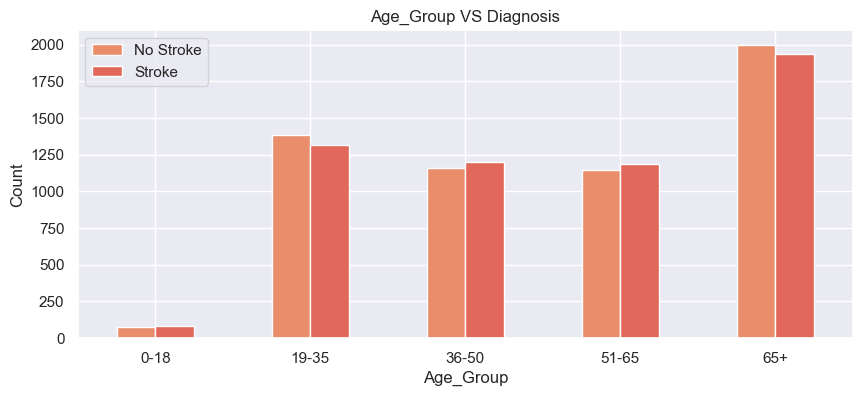

In [59]:
plot_crosstab(df_copy, 'Age_Group', target)

- Patients of 65+ age shows considerably higher stroke count
- Distribution suggests propotion of stroke is lower in age group 0-35

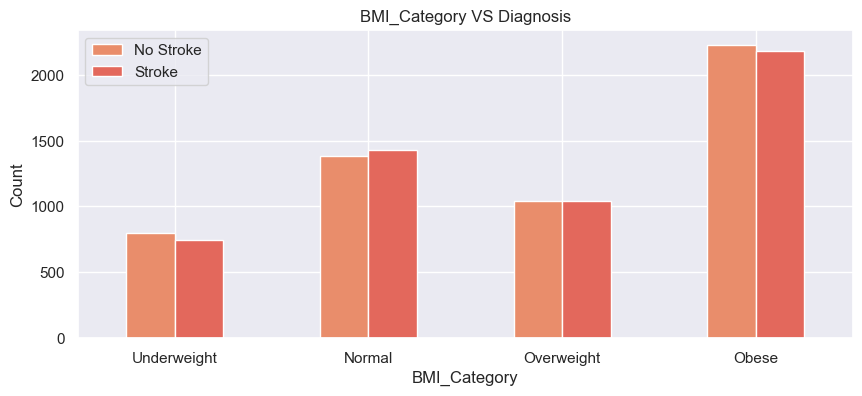

In [60]:
plot_crosstab(df_copy, 'BMI_Category', target)

- Patients with a BMI that falls in the obese category show a considerably higher stroke count

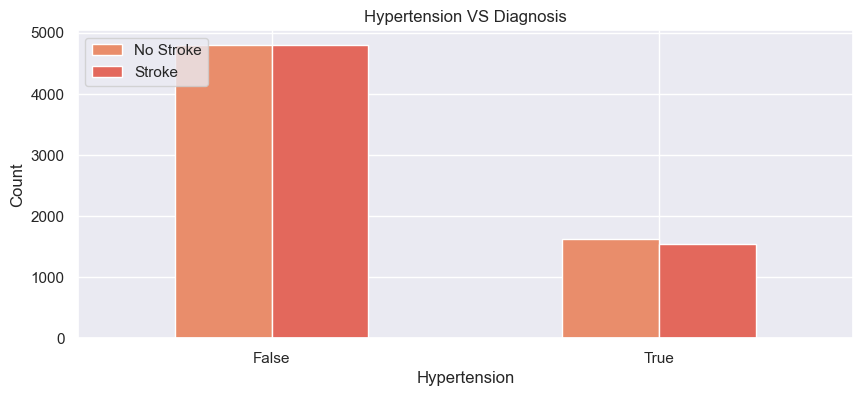

In [61]:
plot_crosstab(df_copy, 'Hypertension', target)

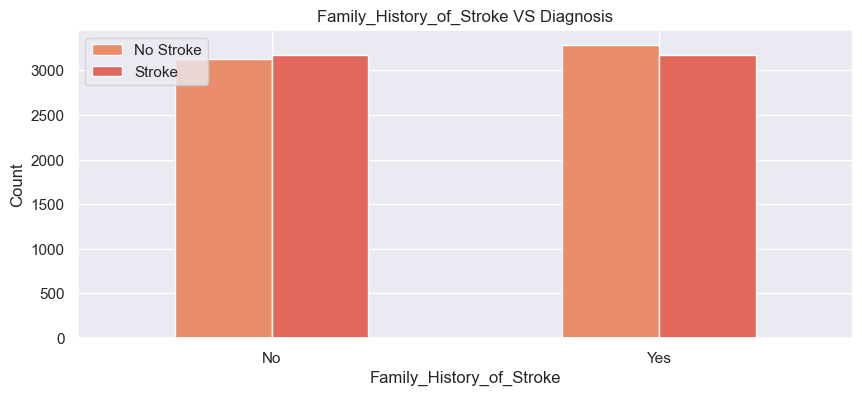

In [62]:
plot_crosstab(df_copy, 'Family_History_of_Stroke', target)

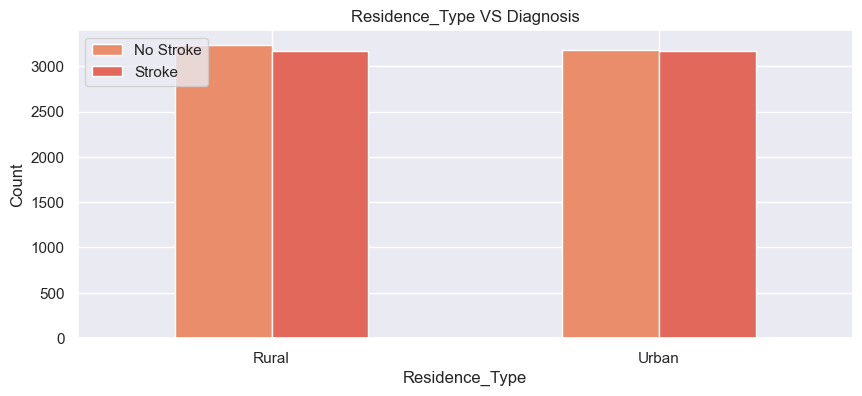

In [63]:
plot_crosstab(df_copy, 'Residence_Type', target)

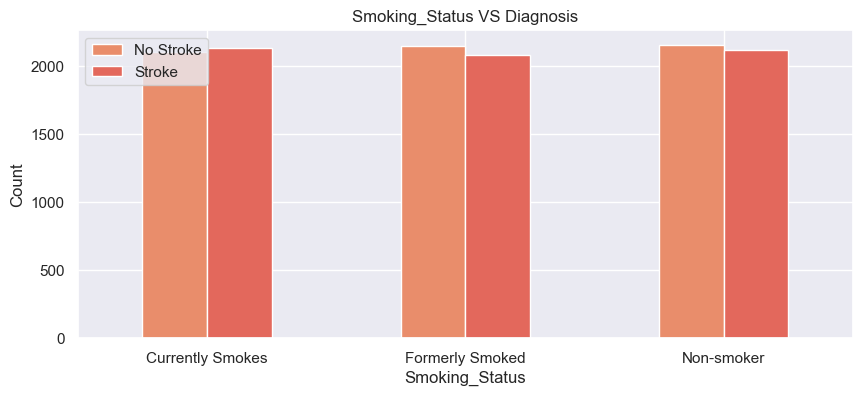

In [64]:
plot_crosstab(df_copy, 'Smoking_Status', target)

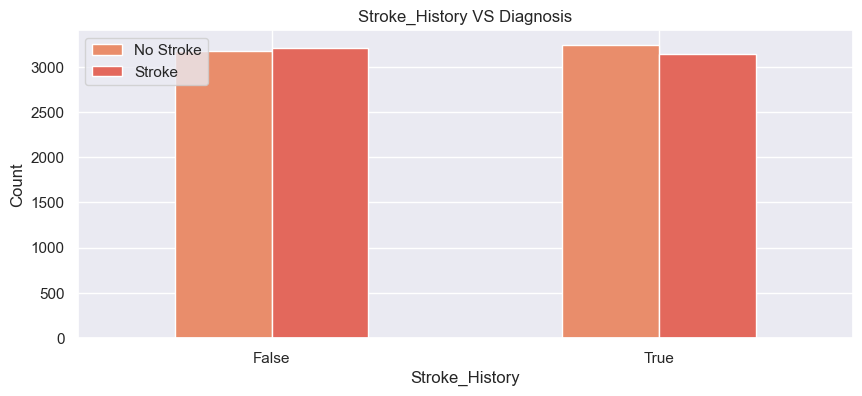

In [65]:
plot_crosstab(df_copy, 'Stroke_History', target)

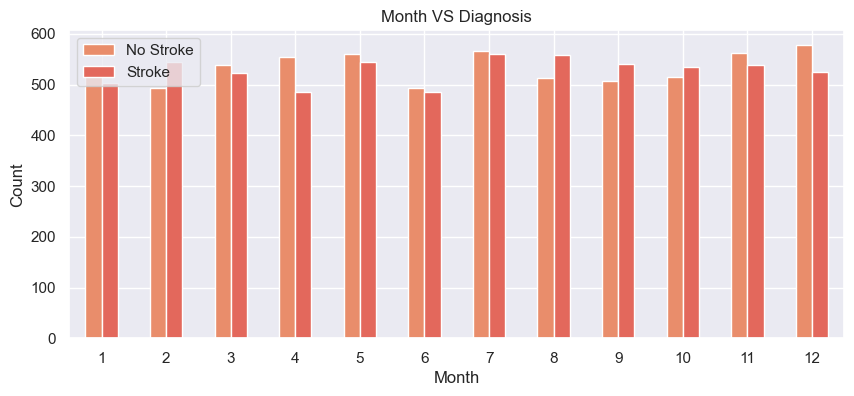

In [66]:
plot_crosstab(df_copy, 'Month', target)

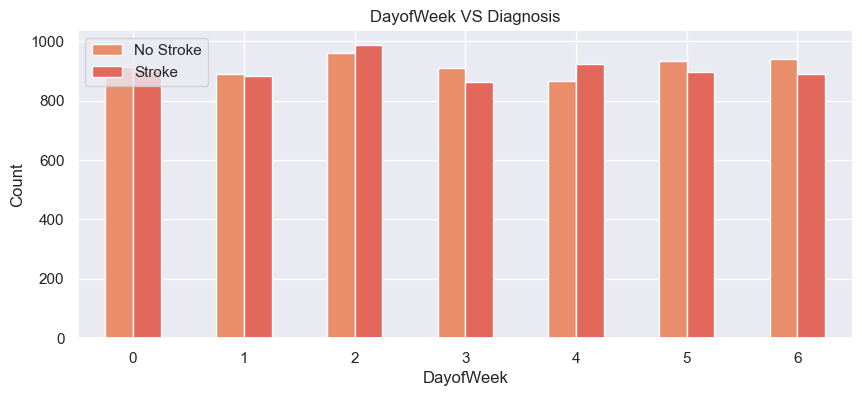

In [67]:
plot_crosstab(df_copy, 'DayofWeek', target)

> Features such as hypertension, stroke history, and family history of stroke are expected to have a clear influence on stroke risk, but the cross-tabulation analysis does not support this, suggesting the data might be synthesized.

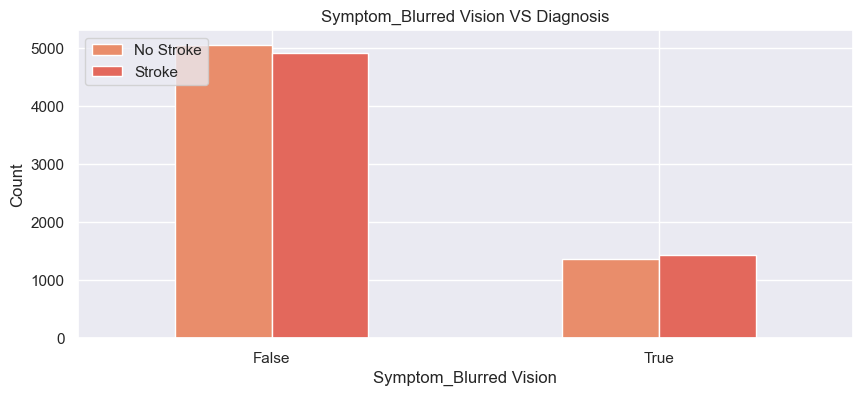

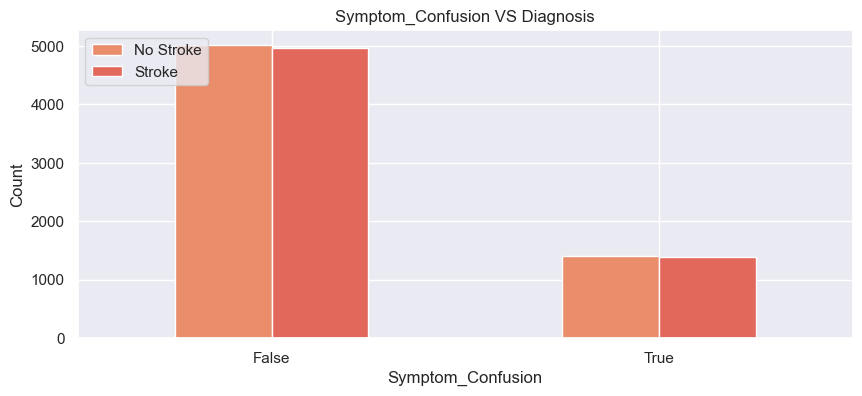

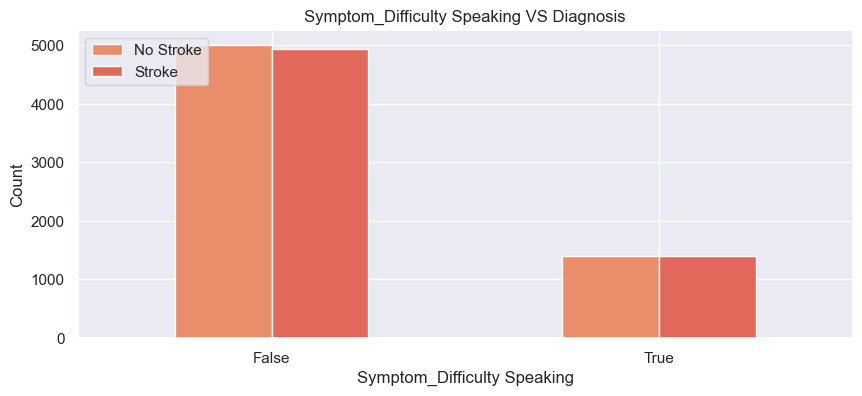

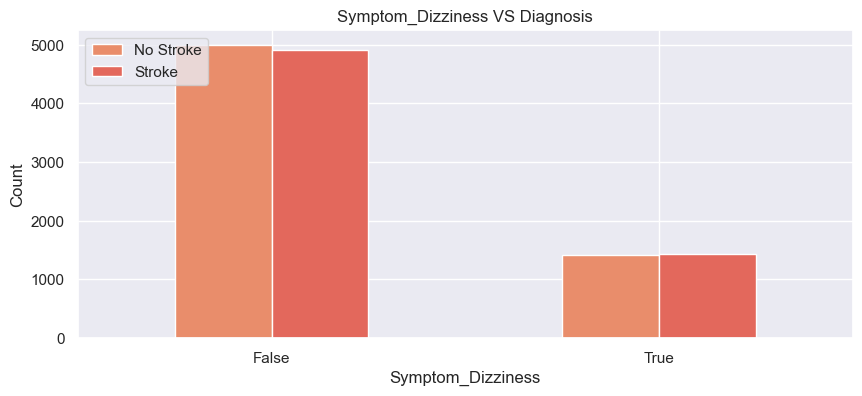

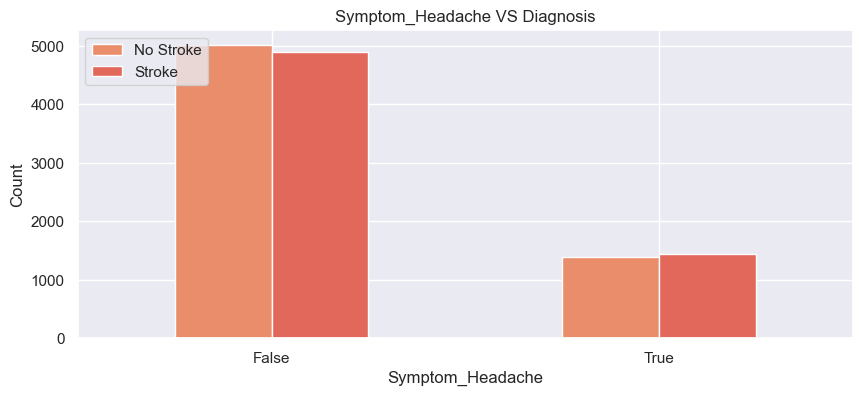

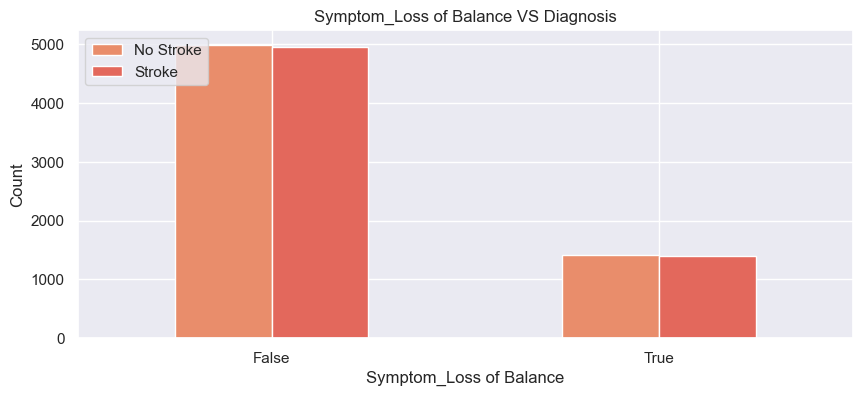

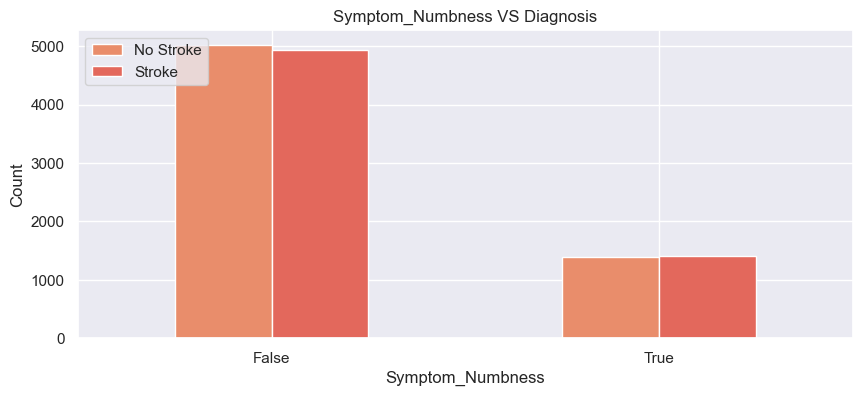

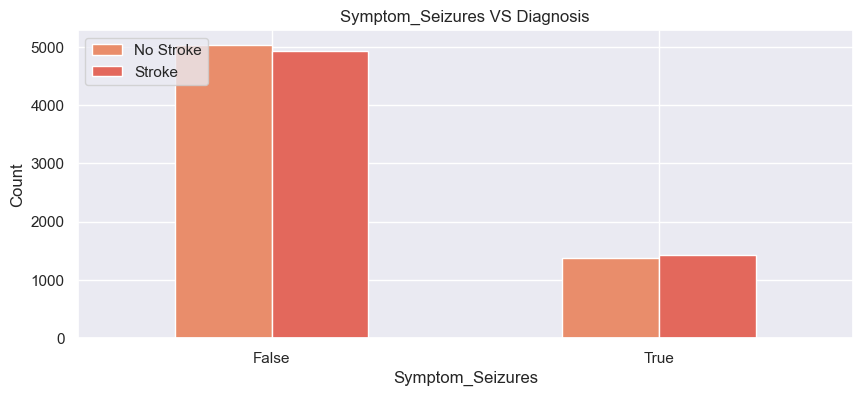

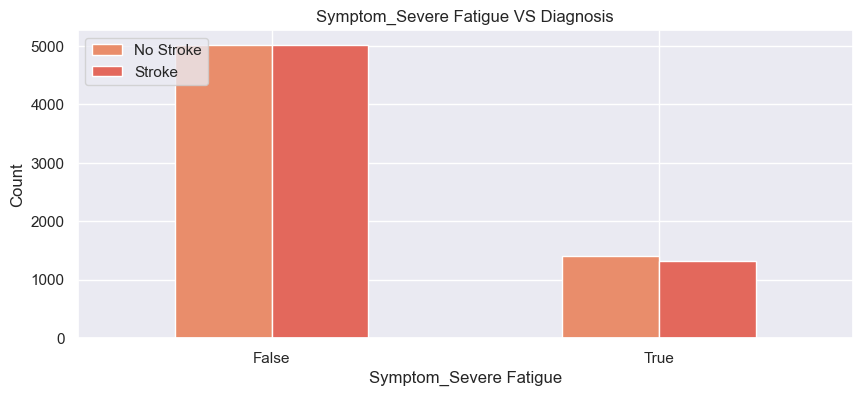

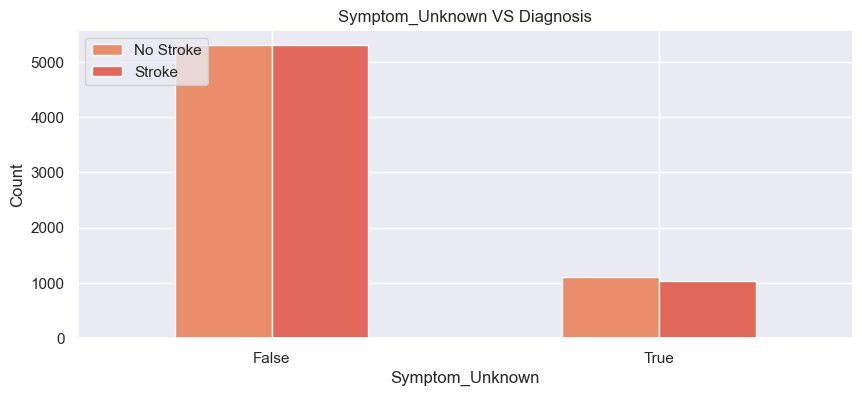

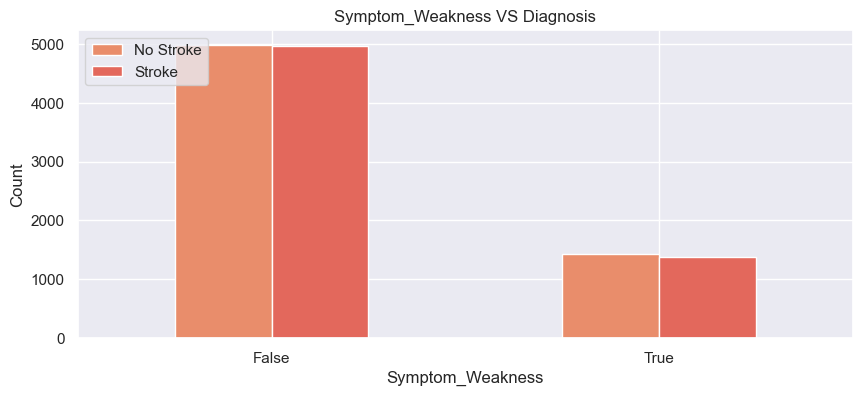

In [68]:
for column in Symptoms_encoded.columns:
    plot_crosstab(df_copy, column, target)

***Presence of symptoms like Blurred Vision, Headache, Numbness, Seizures and Dizziness exhibits a marginally high influence on stroke risk***

<hr>

# DATA CLEANING

Since most irrelevant columns were removed during the exploration we can now move to other phases in data cleaning such as **Handling Missing Values**, **Handling Duplicates**, **Handling Outliers** etc.

In [69]:
df_copy.columns

Index(['Patient_Age', 'Patient_Gender', 'Dietary_Habits', 'LDL_Cholesterol',
       'Work_Type_of_patient', 'Metabolic_Equivalent_of_Task_Score',
       'Marital_Status', 'Physical_Activity', 'Stress_Levels',
       'Average_Glucose_Level', 'Heart_Disease', 'Body_Mass_Index',
       'Alcohol_Intake', 'HDL_Cholesterol', 'Hypertension',
       'Family_History_of_Stroke', 'Diagnosis', 'Residence_Type',
       'Systolic_BP', 'Smoking_Status', 'Diastolic_BP', 'Stroke_History',
       'Age_Group', 'BMI_Category', 'Month', 'DayofWeek',
       'Symptom_Blurred Vision', 'Symptom_Confusion',
       'Symptom_Difficulty Speaking', 'Symptom_Dizziness', 'Symptom_Headache',
       'Symptom_Loss of Balance', 'Symptom_Numbness', 'Symptom_Seizures',
       'Symptom_Severe Fatigue', 'Symptom_Unknown', 'Symptom_Weakness'],
      dtype='object')

In [70]:
len(df_copy.columns)

37

## Renaming Columns

In [71]:
df_copy.rename(columns={
    "Patient_Age" : "Age",
    "Patient_Gender" : "Gender",
    "Dietary_Habits" : "Diet",
    "Work_Type_of_patient" : "Work_Type",
    "Metabolic_Equivalent_of_Task_Score" : "MET_Score",
    "Body_Mass_Index" : "BMI",
    "LDL_Cholesterol" : "LDL",
    "HDL_Cholesterol" : "HDL",
    "Family_History_of_Stroke" : "Family_History"
    
},
inplace=True)

In [72]:
df_copy.head(1)

,Age,Gender,Diet,LDL,Work_Type,MET_Score,Marital_Status,Physical_Activity,Stress_Levels,Average_Glucose_Level,Heart_Disease,BMI,Alcohol_Intake,HDL,Hypertension,Family_History,Diagnosis,Residence_Type,Systolic_BP,Smoking_Status,Diastolic_BP,Stroke_History,Age_Group,BMI_Category,Month,DayofWeek,Symptom_Blurred Vision,Symptom_Confusion,Symptom_Difficulty Speaking,Symptom_Dizziness,Symptom_Headache,Symptom_Loss of Balance,Symptom_Numbness,Symptom_Seizures,Symptom_Severe Fatigue,Symptom_Unknown,Symptom_Weakness
0,50.0,Male,Pescatarian,156.0,Government Job,6,Divorced,Low,8.77,151.44,True,16.49,Never,42.0,True,Yes,No Stroke,Rural,94.0,Non-smoker,82.0,False,36-50,Underweight,5,1,False,True,False,False,False,False,False,False,False,False,False


## Handling Missing Values

In [73]:
def disp_null_count(df, cols):
    for column in cols:
        null_count = df[column].isna().sum()
        if  null_count > 0:
            null_perc = (null_count/len(df[column]))*100
            print(f"{column} \t {null_count} \t {null_perc:.2f} %")

In [74]:
numerical_features = list(df_copy.select_dtypes(include=['float64', 'int64']).columns)

In [75]:
# missing values in numerical features
disp_null_count(df_copy, numerical_features)

Age 	 1272 	 9.97 %
Average_Glucose_Level 	 125 	 0.98 %
BMI 	 1914 	 15.00 %
Systolic_BP 	 318 	 2.49 %
Diastolic_BP 	 318 	 2.49 %


***There are considerable number of missing values in columns 'Age'(~ 10%) and 'BMI'(15%)***

***Columns 'Systolic_BP' and 'Diastolic_BP' were derived from 'BP_Levels', and hence have the same number of missing values***

In [76]:
categorical_features = list(df_copy.select_dtypes(include=['object', 'bool', 'category']).columns)
categorical_features.remove('Diagnosis')

In [77]:
# missing values in categorical features
disp_null_count(df_copy, categorical_features)

Alcohol_Intake 	 253 	 1.98 %
Age_Group 	 1272 	 9.97 %
BMI_Category 	 1914 	 15.00 %


***Missing values in columns will be handled accordingly based on their distribution, presence of ouliers and other factors.***

In [78]:
df_cleaned = df_copy.copy()

Columns **'Average_Glucose_Level'**, **'Systolic_BP'**, **'Diastolic_BP'** and **'Alcohol_Intake'** have < 5% of values missing. Checking for the total number of rows with entries missing in any of these column.

In [79]:
cols_to_check = ['Average_Glucose_Level', 'Systolic_BP', 'Diastolic_BP', 'Alcohol_Intake']
rows_with_null_df = df_cleaned[df_cleaned[cols_to_check].isnull().any(axis=1)]

In [80]:
rows_with_null_df.shape

(684, 37)

In [81]:
(rows_with_null_df.shape[0]/df_cleaned.shape[0])*100

5.360501567398119

***The total number of rows with missing values in these columns sums up to approximately 5% of total entries and can be dropped.***

In [82]:
df_cleaned = df_cleaned.dropna(subset=cols_to_check)

In [83]:
df_cleaned.shape

(12076, 37)

In [84]:
# checking distribution of target after dropping rows
df_cleaned['Diagnosis'].value_counts()

Diagnosis
No Stroke    6076
Stroke       6000
Name: count, dtype: int64

***Target is anearly balanced even after dropping rows.***

In [85]:
# creating function to plot histogram and box plot for numerical columns
def plot_column(df, feature):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    # histogram
    sns.histplot(df[feature], kde=True, ax=axs[0])
    axs[0].set_title(f'{feature} - Histogram')
    # boxplot
    sns.boxplot(x=df[feature], ax=axs[1]) 
    axs[1].set_title(f'{feature} - Box Plot')
    plt.show()

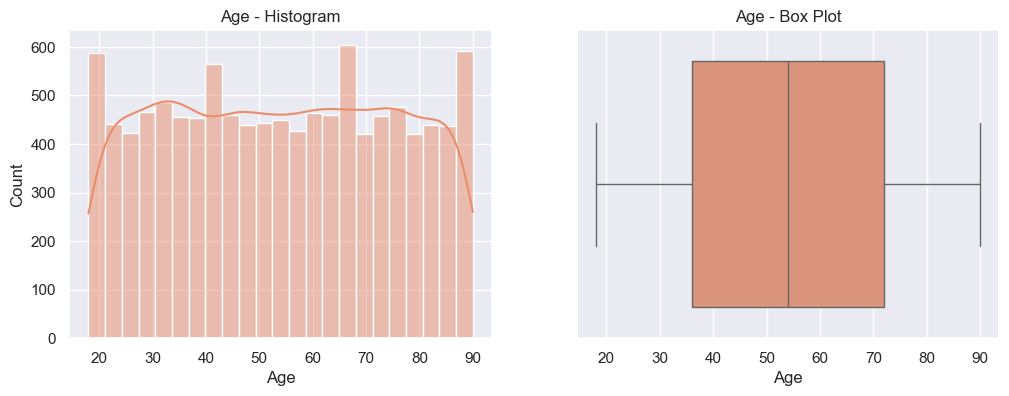

In [86]:
plot_column(df_cleaned, 'Age')

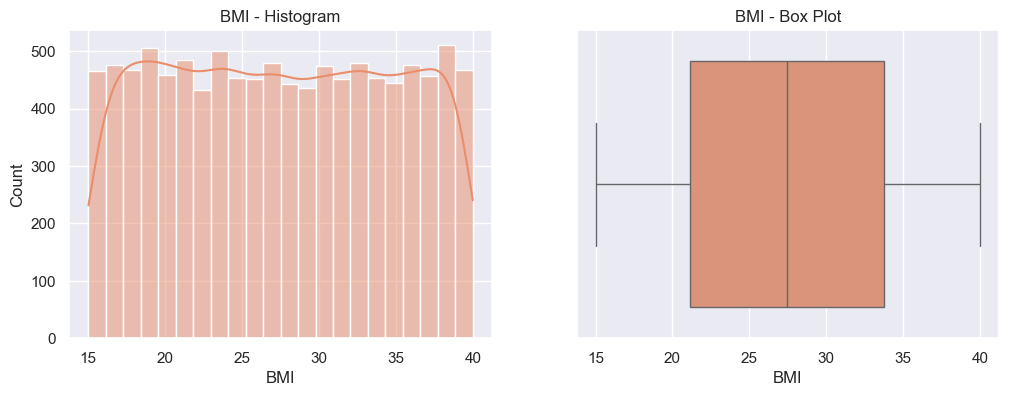

In [87]:
plot_column(df_cleaned, 'BMI')

***Visualizations indicate that both 'Age' and 'BMI' follow a nearly symmetric distribution and have no outliers present. However, imputation using usual practices, such as SimpleImputer, might alter the nature of the distribution. Therefore, explicit random sampling imputation is applied to preserve the nature of distribution.***

In [88]:
# imputing 'Age'
age_non_missing = df_cleaned['Age'].dropna().values  
df_cleaned['Age'] = df_cleaned['Age'].apply(lambda x: np.random.choice(age_non_missing) if np.isnan(x) else x)

In [89]:
# imputing 'BMI'
BMI_non_missing = df_cleaned['BMI'].dropna().values
df_cleaned['BMI'] = df_cleaned['BMI'].apply(lambda x: np.random.choice(BMI_non_missing) if np.isnan(x) else x)

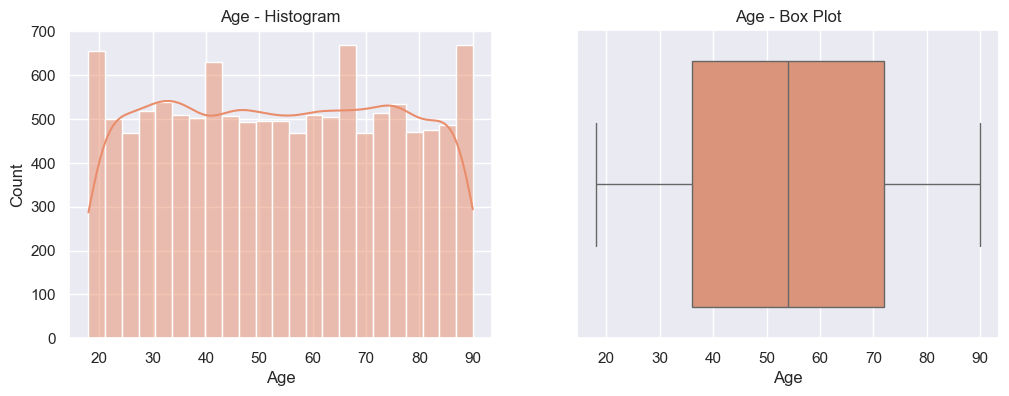

In [90]:
# distribution of 'Age' after imputation
plot_column(df_cleaned, 'Age')

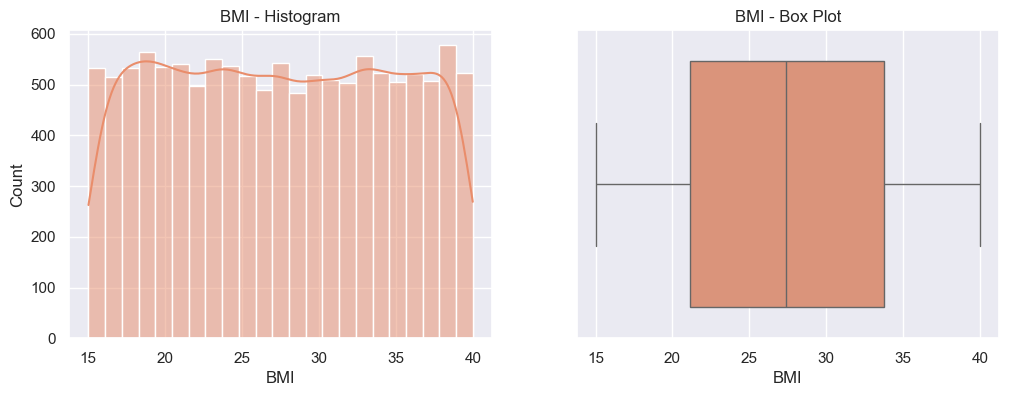

In [91]:
# distribution of 'BMI' after imputation
plot_column(df_cleaned, 'BMI')

***The nature of the distributions seems unaffected.***

In [92]:
# checking for missing values
disp_null_count(df_cleaned, df_cleaned.columns)

Age_Group 	 1207 	 10.00 %
BMI_Category 	 1806 	 14.96 %


> ### All missing values are imputed or dropped

## Encoding Categorical Variables

### Splitting Features (X) and Target (y)

In [93]:
X = df_cleaned.drop(columns = 'Diagnosis')

In [94]:
X.head(1)

,Age,Gender,Diet,LDL,Work_Type,MET_Score,Marital_Status,Physical_Activity,Stress_Levels,Average_Glucose_Level,Heart_Disease,BMI,Alcohol_Intake,HDL,Hypertension,Family_History,Residence_Type,Systolic_BP,Smoking_Status,Diastolic_BP,Stroke_History,Age_Group,BMI_Category,Month,DayofWeek,Symptom_Blurred Vision,Symptom_Confusion,Symptom_Difficulty Speaking,Symptom_Dizziness,Symptom_Headache,Symptom_Loss of Balance,Symptom_Numbness,Symptom_Seizures,Symptom_Severe Fatigue,Symptom_Unknown,Symptom_Weakness
0,50.0,Male,Pescatarian,156.0,Government Job,6,Divorced,Low,8.77,151.44,True,16.49,Never,42.0,True,Yes,Rural,94.0,Non-smoker,82.0,False,36-50,Underweight,5,1,False,True,False,False,False,False,False,False,False,False,False


In [95]:
X.shape

(12076, 36)

In [96]:
y = df_cleaned['Diagnosis']

In [97]:
y.shape

(12076,)

### Encoding Categorical Features Using OHE

In [98]:
X[categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 12076 entries, 0 to 12759
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Gender                       12076 non-null  object  
 1   Diet                         12076 non-null  object  
 2   Work_Type                    12076 non-null  object  
 3   MET_Score                    12076 non-null  object  
 4   Marital_Status               12076 non-null  object  
 5   Physical_Activity            12076 non-null  object  
 6   Heart_Disease                12076 non-null  bool    
 7   Alcohol_Intake               12076 non-null  object  
 8   Hypertension                 12076 non-null  bool    
 9   Family_History               12076 non-null  object  
 10  Residence_Type               12076 non-null  object  
 11  Smoking_Status               12076 non-null  object  
 12  Stroke_History               12076 non-null  bool    
 13  Age_Gr

In [99]:
cols_to_encode = list(X.select_dtypes(include=['object', 'category']).columns)

In [100]:
cols_to_encode

['Gender',
 'Diet',
 'Work_Type',
 'MET_Score',
 'Marital_Status',
 'Physical_Activity',
 'Alcohol_Intake',
 'Family_History',
 'Residence_Type',
 'Smoking_Status',
 'Age_Group',
 'BMI_Category',
 'Month',
 'DayofWeek']

In [101]:
X_encoded = pd.get_dummies(X, columns=cols_to_encode, drop_first=True)

In [102]:
X.head(3)

,Age,Gender,Diet,LDL,Work_Type,MET_Score,Marital_Status,Physical_Activity,Stress_Levels,Average_Glucose_Level,Heart_Disease,BMI,Alcohol_Intake,HDL,Hypertension,Family_History,Residence_Type,Systolic_BP,Smoking_Status,Diastolic_BP,Stroke_History,Age_Group,BMI_Category,Month,DayofWeek,Symptom_Blurred Vision,Symptom_Confusion,Symptom_Difficulty Speaking,Symptom_Dizziness,Symptom_Headache,Symptom_Loss of Balance,Symptom_Numbness,Symptom_Seizures,Symptom_Severe Fatigue,Symptom_Unknown,Symptom_Weakness
0,50.0,Male,Pescatarian,156.0,Government Job,6,Divorced,Low,8.77,151.44,True,16.49,Never,42.0,True,Yes,Rural,94.0,Non-smoker,82.0,False,36-50,Underweight,5,1,False,True,False,False,False,False,False,False,False,False,False
1,63.0,Male,Pescatarian,75.0,Government Job,6,Divorced,Moderate,9.08,183.56,False,28.64,Rarely,57.0,False,Yes,Rural,159.0,Currently Smokes,108.0,False,NaN,Overweight,11,1,False,True,False,False,False,False,False,True,False,False,False
3,23.0,Male,Gluten-Free,67.0,Private,7,Single,Moderate,3.34,146.71,False,38.95,Frequent Drinker,55.0,False,Yes,Urban,152.0,Currently Smokes,103.0,True,19-35,Obese,4,4,False,False,False,True,False,False,False,False,False,False,False


In [103]:
X_encoded.head(3)

,Age,LDL,Stress_Levels,Average_Glucose_Level,Heart_Disease,BMI,HDL,Hypertension,Systolic_BP,Diastolic_BP,Stroke_History,Symptom_Blurred Vision,Symptom_Confusion,Symptom_Difficulty Speaking,Symptom_Dizziness,Symptom_Headache,Symptom_Loss of Balance,Symptom_Numbness,Symptom_Seizures,Symptom_Severe Fatigue,Symptom_Unknown,Symptom_Weakness,Gender_Male,Diet_Keto,Diet_Non-Vegetarian,Diet_Paleo,Diet_Pescatarian,Diet_Vegan,Diet_Vegetarian,Work_Type_Never Worked,Work_Type_Private,Work_Type_Self-employed,MET_Score_5,MET_Score_6,MET_Score_7,MET_Score_8,MET_Score_9,MET_Score_10,Marital_Status_Married,Marital_Status_Single,Physical_Activity_Low,Physical_Activity_Moderate,Alcohol_Intake_Never,Alcohol_Intake_Rarely,Alcohol_Intake_Social Drinker,Family_History_Yes,Residence_Type_Urban,Smoking_Status_Formerly Smoked,Smoking_Status_Non-smoker,Age_Group_19-35,Age_Group_36-50,Age_Group_51-65,Age_Group_65+,BMI_Category_Normal,BMI_Category_Overweight,BMI_Category_Obese,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,DayofWeek_1,DayofWeek_2,DayofWeek_3,DayofWeek_4,DayofWeek_5,DayofWeek_6
0,50.0,156.0,8.77,151.44,True,16.49,42.0,True,94.0,82.0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
1,63.0,75.0,9.08,183.56,False,28.64,57.0,False,159.0,108.0,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
3,23.0,67.0,3.34,146.71,False,38.95,55.0,False,152.0,103.0,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [104]:
X_encoded.shape

(12076, 73)

### Encoding Target ('Diagnosis') Using LE

In [105]:
y.value_counts()

Diagnosis
No Stroke    6076
Stroke       6000
Name: count, dtype: int64

In [106]:
y.replace({'No Stroke':0, 'Stroke':1}, inplace=True)

> ### All categorical columns are encoded

## Handling Outliers

In [107]:
numerical_features

['Age',
 'LDL',
 'Stress_Levels',
 'Average_Glucose_Level',
 'BMI',
 'HDL',
 'Systolic_BP',
 'Diastolic_BP']

In [108]:
#defining function to create skewness kurtosis report of numerical features
skew_values = []
skew_types = []
skew_levels = []
kurt_values = []
kurt_types = []

def create_skew_kurt_report(df, features):
    for feature in features:
        skew = df[feature].skew()
        kurt = df[feature].kurt()
        skew_values.append(skew)
        kurt_values.append(kurt)
        
        #determining skewness type (+ve or -ve)
        if skew >= 0:
            skew_types.append('Positive')
        else:
            skew_types.append('Negative')
            
        #determining skewness level (low, moderate or high)
        if skew == 0:
            skew_levels.append('Symmetrical')
        elif skew < -1 or skew > 1:
            skew_levels.append('High')
        elif (skew >= -1 and skew < -0.5) or (skew >= 0.5 and skew < 1):
            skew_levels.append('Moderate')
        else:
            skew_levels.append('Low')
            
        #determining kurtosis type (Platykurtic, Leptokurtic, Mesokurtic)
        if kurt < 3:
            kurt_types.append('Platykurtic')
        elif kurt > 3:
            kurt_types.append('Leptokurtic')
        else:
            kurt_types.append('Mesokurtic')
            
    report = pd.DataFrame({
        'Feature': features,
        'Skewness': skew_values,
        'Skewness Type': skew_types,
        'Skewness Level': skew_levels,
        'Kurtosis': kurt_values,
        'Kurtosis Type': kurt_types
    })
    
    report.set_index('Feature', inplace=True)

    return report

In [109]:
report = create_skew_kurt_report(X_encoded, numerical_features)

In [110]:
#function to highlight 'Skewness Level' cell
def highlight_cells(val):
    if val == 'High':
        color = '#f5b7b1'  
    elif val == 'Moderate':
        color = '#f9e79f'  
    else:
        color = '#abebc6'  
    
    return f'background-color: {color}'

In [111]:
report = report.style.applymap(highlight_cells, subset=['Skewness Level'])

In [112]:
report

,Skewness,Skewness Type,Skewness Level,Kurtosis,Kurtosis Type
Feature,,,,,
Age,0.006988,Positive,Low,-1.203814,Platykurtic
LDL,-0.000595,Negative,Low,-1.188675,Platykurtic
Stress_Levels,-0.011285,Negative,Low,-1.199859,Platykurtic
Average_Glucose_Level,0.013485,Positive,Low,-1.198454,Platykurtic
BMI,0.011642,Positive,Low,-1.217332,Platykurtic
HDL,0.009010,Positive,Low,-1.224990,Platykurtic
Systolic_BP,-0.014430,Negative,Low,-1.210665,Platykurtic
Diastolic_BP,0.025603,Positive,Low,-1.188048,Platykurtic


***Distrution of features (from data exploration) and skewness levels shows no need of transformations. Attempting to apply transformation on the features could potentially over-transform the data.***

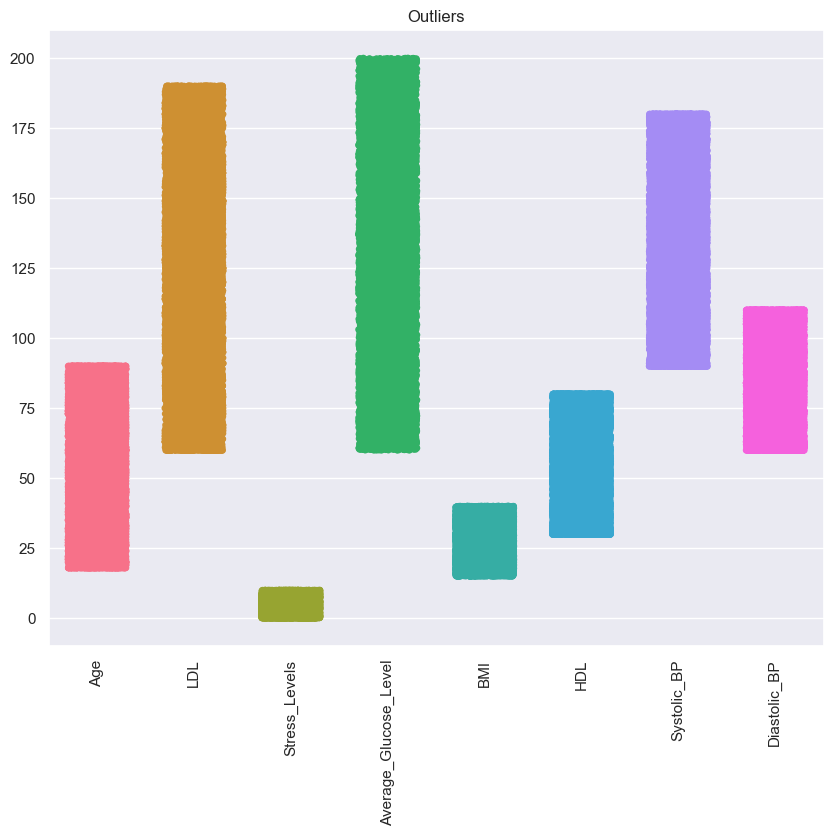

In [113]:
# strip plot of numerical features
plt.figure(figsize=(10, 8))
cols_to_plot = X_encoded[numerical_features]
sns.stripplot(data=cols_to_plot, jitter=0.3, size=5)
plt.title("Outliers")
plt.xticks(rotation=90)
plt.show()

***No sign of outliers in stripplot***

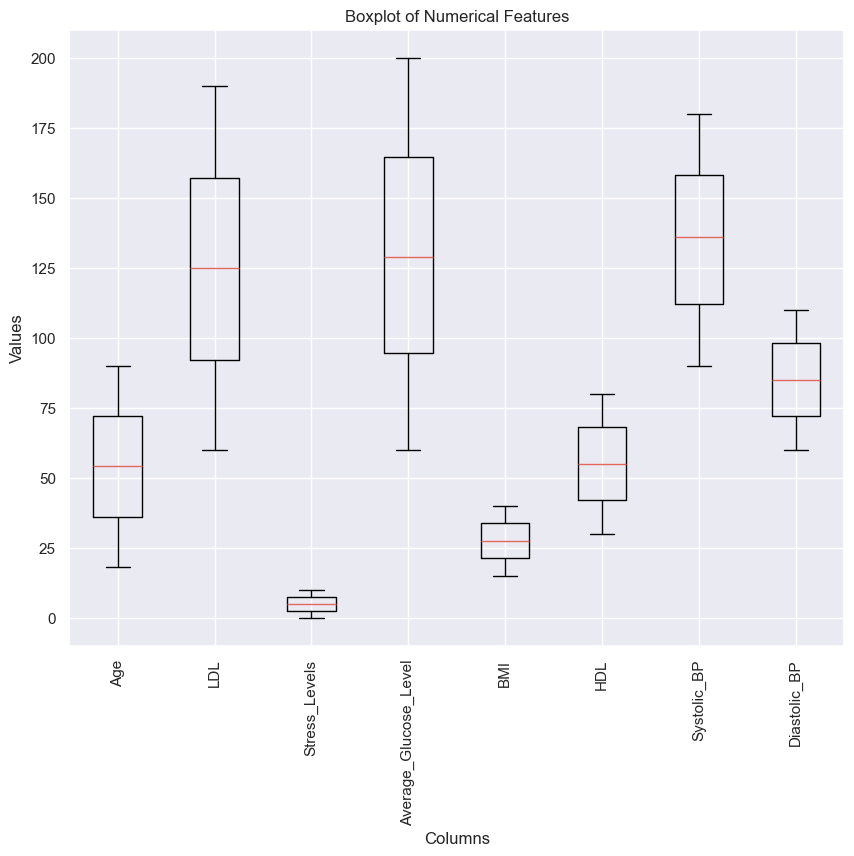

In [114]:
# box plot of numerical features
plt.figure(figsize=(10, 8))
plt.boxplot(cols_to_plot.values, labels=cols_to_plot.columns)
plt.title("Boxplot of Numerical Features")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.show()

***No sign of outliers in boxplot***

In [115]:
# outlier detection using Z Score method
for feature in numerical_features:
    mean = X_encoded[feature].mean()
    std_dev = X_encoded[feature].std()
    X_encoded[f'{feature}_z_scores'] = np.abs((X_encoded[feature] - mean) / std_dev)
    outliers = X_encoded[(X_encoded[f'{feature}_z_scores'] > 3)]
    if outliers.shape[0] > 0:
        print(f'{feature}\n')
        print(outliers)
        print()

***No outliers based on Z Score method***

In [116]:
# dropping Z Score columns
drop_z_scores = []
for feature in numerical_features:
    drop_z_scores.append(f'{feature}_z_scores')
    
X_encoded.drop(columns=drop_z_scores, inplace=True)

In [117]:
# outlier detection using IQR Score method
for feature in numerical_features:
    q1 = X_encoded[feature].quantile(0.25)
    q3 = X_encoded[feature].quantile(0.75)
    iqr = q3 - q1
    LB_iqr = q1 - 1.5 * iqr
    UB_iqr = q3 + 1.5 * iqr
    outliers = X_encoded[(X_encoded[feature] < LB_iqr) | (X_encoded[feature] > UB_iqr)]
    if outliers.shape[0] > 0:
        print(f'{feature}\n')
        print(outliers)
        print()

***No outliers based on IQR method***

> ### Visualizations and statistical methods show no sign of outliers in data

## Handling Duplicates

In [118]:
# checking for duplicates
X_encoded.duplicated().sum()

0

> ### There are no duplicate entries

<hr>

# DATA PREPROCESSING

Since the data is **already split** into 'features' and 'target' and target is **balanced** we can move on to the other phases of preparing and transforming the raw data into a suitable format for model training.

## Scaling Numerical Features

In [119]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled=X_encoded.copy()
X_scaled[numerical_features] = scaler.fit_transform(X_scaled[numerical_features])

In [120]:
X_scaled.head(3)

,Age,LDL,Stress_Levels,Average_Glucose_Level,Heart_Disease,BMI,HDL,Hypertension,Systolic_BP,Diastolic_BP,Stroke_History,Symptom_Blurred Vision,Symptom_Confusion,Symptom_Difficulty Speaking,Symptom_Dizziness,Symptom_Headache,Symptom_Loss of Balance,Symptom_Numbness,Symptom_Seizures,Symptom_Severe Fatigue,Symptom_Unknown,Symptom_Weakness,Gender_Male,Diet_Keto,Diet_Non-Vegetarian,Diet_Paleo,Diet_Pescatarian,Diet_Vegan,Diet_Vegetarian,Work_Type_Never Worked,Work_Type_Private,Work_Type_Self-employed,MET_Score_5,MET_Score_6,MET_Score_7,MET_Score_8,MET_Score_9,MET_Score_10,Marital_Status_Married,Marital_Status_Single,Physical_Activity_Low,Physical_Activity_Moderate,Alcohol_Intake_Never,Alcohol_Intake_Rarely,Alcohol_Intake_Social Drinker,Family_History_Yes,Residence_Type_Urban,Smoking_Status_Formerly Smoked,Smoking_Status_Non-smoker,Age_Group_19-35,Age_Group_36-50,Age_Group_51-65,Age_Group_65+,BMI_Category_Normal,BMI_Category_Overweight,BMI_Category_Obese,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,DayofWeek_1,DayofWeek_2,DayofWeek_3,DayofWeek_4,DayofWeek_5,DayofWeek_6
0,-0.186634,0.824344,1.303598,0.542015,True,-1.513901,-0.877414,True,-1.563758,-0.197485,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
1,0.430712,-1.334628,1.411387,1.335447,False,0.160752,0.133647,False,0.900682,1.583464,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
3,-1.468813,-1.547860,-0.584451,0.425173,False,1.581795,-0.001161,False,0.635281,1.240974,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [121]:
X_scaled.shape

(12076, 73)

In [122]:
df_file_path = '../DATA/Stroke_Dataset_Scaled.csv'
pd.concat([X_scaled, y], axis = 1).to_csv(df_file_path)

In [123]:
X_scaled.shape

(12076, 73)

<hr>    

# MODEL IMPLEMENTATION

I mentioned earlier during EDA that this *dataset might be synthesized*. There wasn’t any *class imbalance*, and since I aimed to build a more *interpretable model*, I decided not to use ensemble methods. In earlier versions of this notebook, I experimented with various predefined models from the **sklearn library**, including `LogisticRegression`, `DecisionTreeClassifier`, `RandomForestClassifier`, `SVC` and `KNeighborsClassifier`. <br>I explored different approaches, such as training models with and without scaling, performing feature selection using `RFE`, deriving principal components with `PCA`, and applying *cross-validation* and *hyperparameter tuning* alongside these methods. However, all of these resulted in validation accuracy and other evaluation metrics (precision, recall, F1 score, AUC, etc.) revolving around **50%** (which indicates nothing more than mere guessing). Consequently, I decided to try a Multi-Layer Perceptron (MLP).

## Multi-Layer Perceptron (MLP)

Multi-Layer Perceptron (MLP) is an artificial neural network widely used for solving classification and regression tasks. A Multi-Layer Perceptron (MLP) consists of fully connected dense layers that transform input data from one dimension to another. It is called “multi-layer” because it contains an input layer, one or more hidden layers, and an output layer. The purpose of an MLP is to model complex relationships between inputs and outputs.

Experimented with the `MLPClassifier` from `sklearn.neural_network` which was not better than other approaches. Afterwards went for a more explicit approach.

In [124]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [125]:
# splitting train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [126]:
X_train.shape

(9660, 73)

In [127]:
X_test.shape

(2416, 73)

In [128]:
y_train.shape

(9660,)

In [129]:
y_test.shape

(2416,)

In [130]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 12272 to 7691
Data columns (total 73 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             9660 non-null   float64
 1   LDL                             9660 non-null   float64
 2   Stress_Levels                   9660 non-null   float64
 3   Average_Glucose_Level           9660 non-null   float64
 4   Heart_Disease                   9660 non-null   bool   
 5   BMI                             9660 non-null   float64
 6   HDL                             9660 non-null   float64
 7   Hypertension                    9660 non-null   bool   
 8   Systolic_BP                     9660 non-null   float64
 9   Diastolic_BP                    9660 non-null   float64
 10  Stroke_History                  9660 non-null   bool   
 11  Symptom_Blurred Vision          9660 non-null   bool   
 12  Symptom_Confusion               966

In [131]:
# keras.Sequential creates a linear stack of layers
mlp_model = keras.Sequential([
    layers.Dense(128, input_dim=X_train.shape[1], activation='relu'), # input layer
    
    layers.Dense(64, activation='relu'), # hidden layer 1
    
    layers.Dense(32, activation='relu'), # hidden layer 2
    
    layers.Dense(1, activation='sigmoid') # output layer
])
# mlp_model.summary()

In [132]:
mlp_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [133]:
history = mlp_model.fit(X_train, y_train, 
                    epochs=80, 
                    batch_size=32, 
                    validation_data=(X_test, y_test))

Epoch 1/80
302/302 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5002 - loss: 0.6964 - val_accuracy: 0.5017 - val_loss: 0.6948
Epoch 2/80
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5472 - loss: 0.6866 - val_accuracy: 0.4934 - val_loss: 0.6978
Epoch 3/80
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5754 - loss: 0.6783 - val_accuracy: 0.5070 - val_loss: 0.7020
Epoch 4/80
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6149 - loss: 0.6595 - val_accuracy: 0.4876 - val_loss: 0.7201
Epoch 5/80
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6474 - loss: 0.6350 - val_accuracy: 0.5004 - val_loss: 0.7411
Epoch 6/80
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6808 - loss: 0.5967 - val_accuracy: 0.4801 - val_loss: 0.7752
Epoch 7/80
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7189 - loss: 0.5564 - val_accuracy: 0.4938 - val_loss: 0.8287
Epoch 8/80
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7633 - loss: 0.5014 - val_accuracy: 0.

Epoch 51/80
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.0015e-04 - val_accuracy: 0.4988 - val_loss: 5.1262
Epoch 52/80
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 8.4858e-05 - val_accuracy: 0.5012 - val_loss: 5.2142
Epoch 53/80
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 7.0190e-05 - val_accuracy: 0.5021 - val_loss: 5.2714
Epoch 54/80
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 6.0763e-05 - val_accuracy: 0.5012 - val_loss: 5.3822
Epoch 55/80
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 5.2930e-05 - val_accuracy: 0.5012 - val_loss: 5.4720
Epoch 56/80
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 4.5750e-05 - val_accuracy: 0.5008 - val_loss: 5.5490
Epoch 57/80
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.8185e-05 - val_accuracy: 0.5021 - val_loss: 5.6339
Epoch 58/80
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.00

In [134]:
test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5053 - loss: 7.7742
Test Accuracy: 0.4992


In [135]:
from sklearn.metrics import classification_report
y_pred_probs = mlp_model.predict(X_test)
y_pred = (y_pred_probs >= 0.5).astype(int)
print(classification_report(y_test, y_pred, target_names=["No Stroke", "Stroke"]))

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

   No Stroke       0.48      0.52      0.50      1167
      Stroke       0.52      0.48      0.50      1249

    accuracy                           0.50      2416
   macro avg       0.50      0.50      0.50      2416
weighted avg       0.50      0.50      0.50      2416



76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ROC AUC: 0.5035


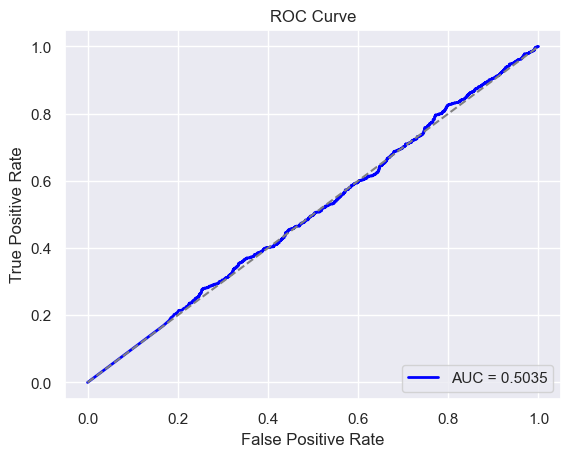

In [136]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class (Stroke)
y_pred_probs = mlp_model.predict(X_test)  

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Print the AUC value
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


<hr>

# CONCLUSION

### As mentioned earlier the dataset is probably synthesised and the labels are probably labelled incorrectly. Models including MLP failed to acquire validation accuracy and other metrics more than 50%, which indicates what the model doing is mere guessing. 